In [2]:
import torch
import matplotlib.pyplot as plt
import os
import numpy as np
import pathlib
import yaml
import time
import argparse

from main import run
from utils.utils import set_paths
from data_stuff.utils import SettingsTraining, SettingsPrepare
from prepare_dataset import prepare_dataset

%load_ext autoreload
%autoreload 2

In [7]:
args = {}
args["dataset_name"] = "BENCHMARK_BOXES"
args["device"] = "cuda:1"
args["epochs"] = 0
args["case"] = "test"
args["model_choice"] = "unet"
args["name_folder_destination"] = "test_nn_bm"
args["name_extension"] = ""
args["case_2hp"] = False

In [19]:
def overall(lengths_sim, lengths_nn, widths_sim, widths_nn, max_temps_sim, max_temps_nn):
    overall_length = 0
    num_length = 0
    overall_width = 0
    num_width = 0
    overall_max_temp = 0
    num_temp = 0

    for idx, entry in enumerate(lengths_sim):
        try:
            length = abs(lengths_nn[idx] - lengths_sim[idx])/lengths_sim[idx]
            overall_length += length
            num_length += 1
        except:
            if lengths_nn[idx] != 0 and lengths_sim[idx] == 0:
                length = abs(lengths_nn[idx] - lengths_sim[idx])/lengths_nn[idx]
                overall_length += length
                num_length += 1
            print("len", lengths_nn[idx], lengths_sim[idx])
        
        try:
            width = abs(widths_nn[idx] - widths_sim[idx])/widths_sim[idx]
            overall_width += width
            num_width += 1
        except:
            if widths_nn[idx] != 0 and widths_sim[idx] == 0:
                width = abs(widths_nn[idx] - widths_sim[idx])/widths_nn[idx]
                overall_width += width
                num_width += 1
            print("width", widths_nn[idx], widths_sim[idx])

        try:
            max_temp = abs(max_temps_nn[idx] - max_temps_sim[idx])/max_temps_sim[idx]
            overall_max_temp += max_temp
            num_temp += 1
        except:
            print("temp", max_temps_nn[idx], max_temps_sim[idx])


    overall_length_1 = overall_length / num_length
    overall_length_2 = overall_length / len(lengths_sim)
    overall_width_1 = overall_width / num_width
    overall_width_2 = overall_width / len(widths_sim)
    overall_max_temp = overall_max_temp / num_temp

    print(f"overall length2: {round(overall_length_2*100, 2)}%")
    print(f"overall length1: {round(overall_length_1*100, 2)}% in {num_length} samples")
    print(f"overall width2: {round(overall_width_2*100, 2)}%")
    print(f"overall width1: {round(overall_width_1*100, 2)}% in {num_width} samples")
    print(f"overall max temp: {round(overall_max_temp*100, 2)}% in {num_temp} samples")


# pksi 1000

t_true length (max y): 440.6239549397085, width (max x): 80.0, max temp: 15.600377082824707
t_out length (max y): 450.0055920995073, width (max x): 80.0, max temp: 15.63817024230957


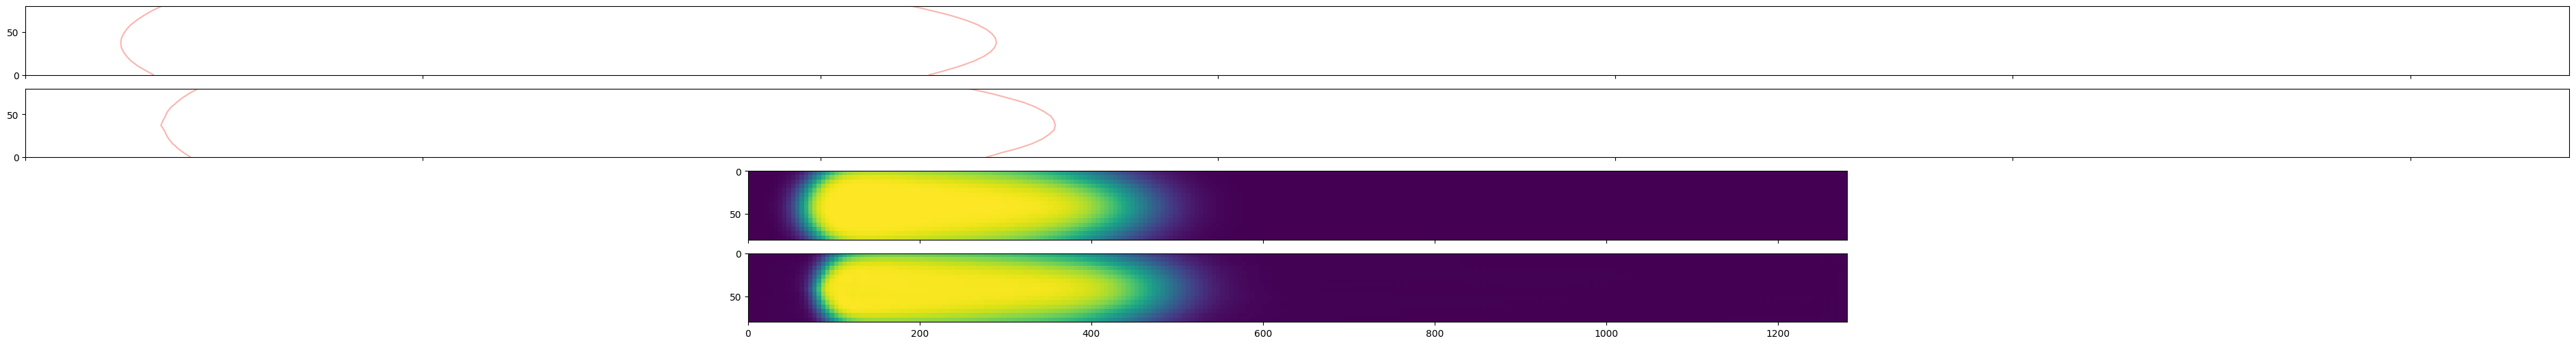

t_true length (max y): 0, width (max x): 0, max temp: 10.99206829071045
t_out length (max y): 0, width (max x): 0, max temp: 10.964957237243652


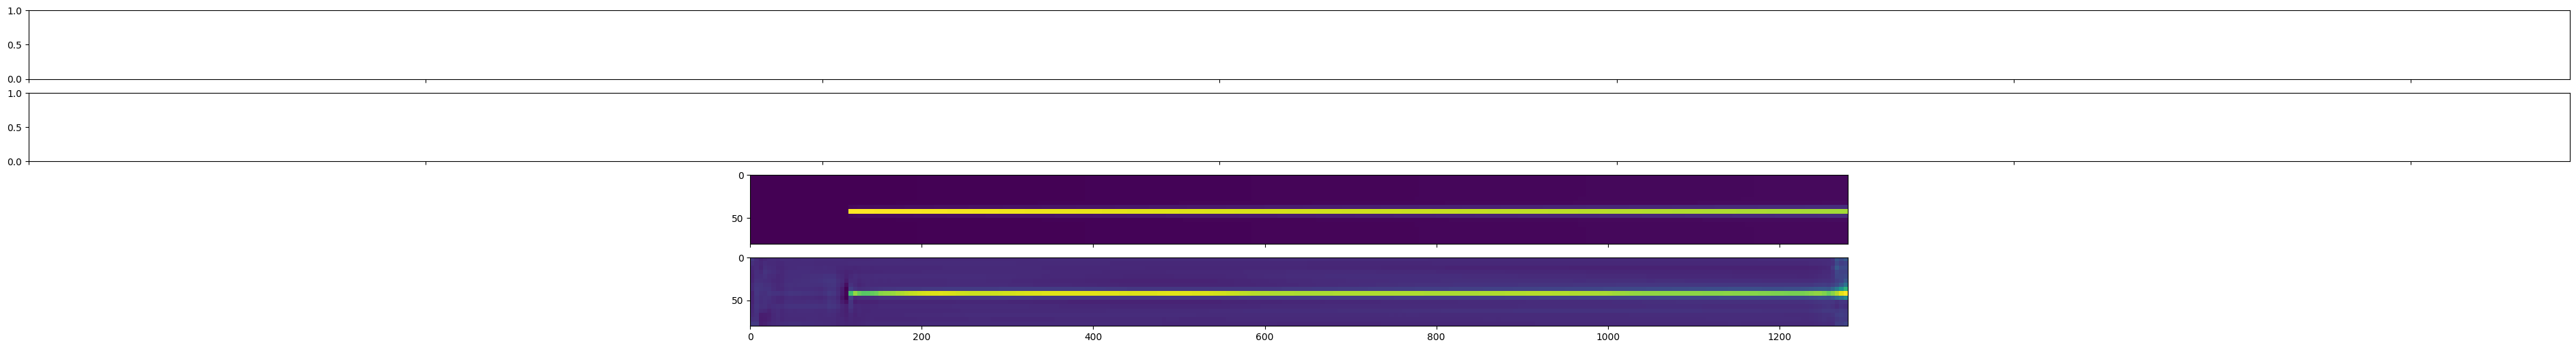

t_true length (max y): 757.8240923948172, width (max x): 80.0, max temp: 15.598639488220215
t_out length (max y): 850.2005959440271, width (max x): 77.41551870771934, max temp: 15.971302032470703


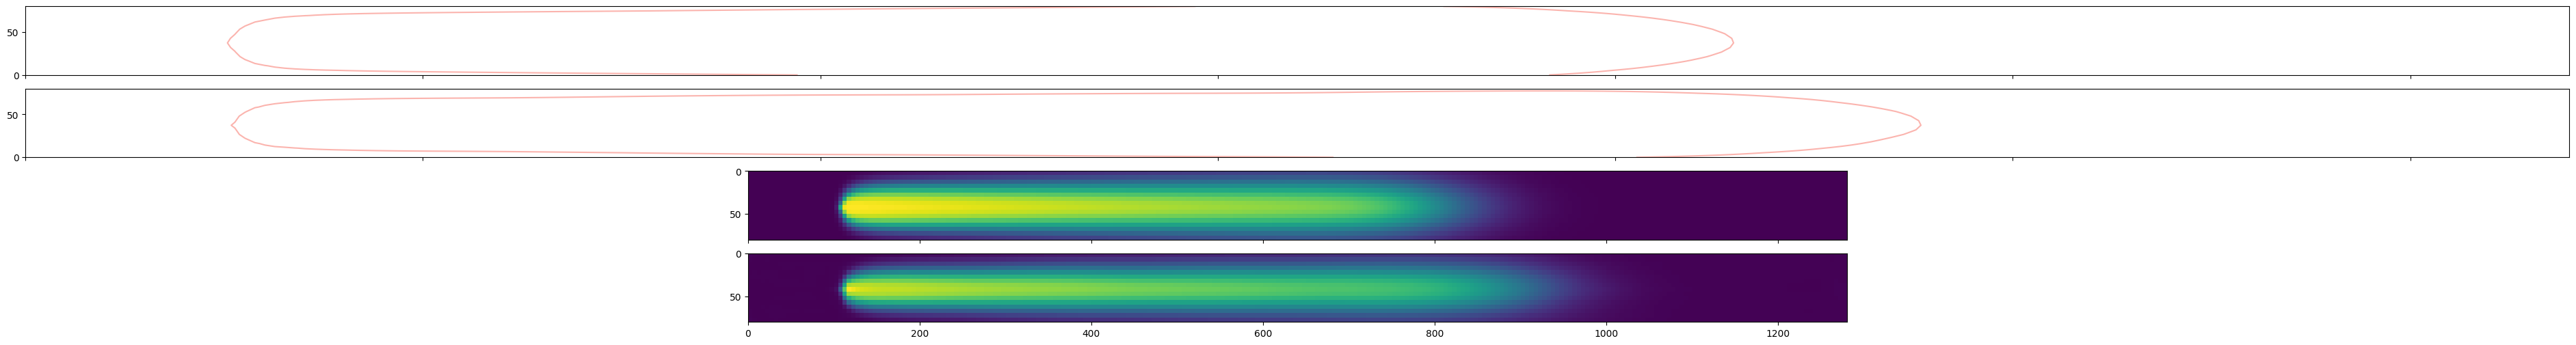

t_true length (max y): 414.16909726967936, width (max x): 80.0, max temp: 15.600358963012695
t_out length (max y): 427.65859359333234, width (max x): 80.0, max temp: 15.630435943603516


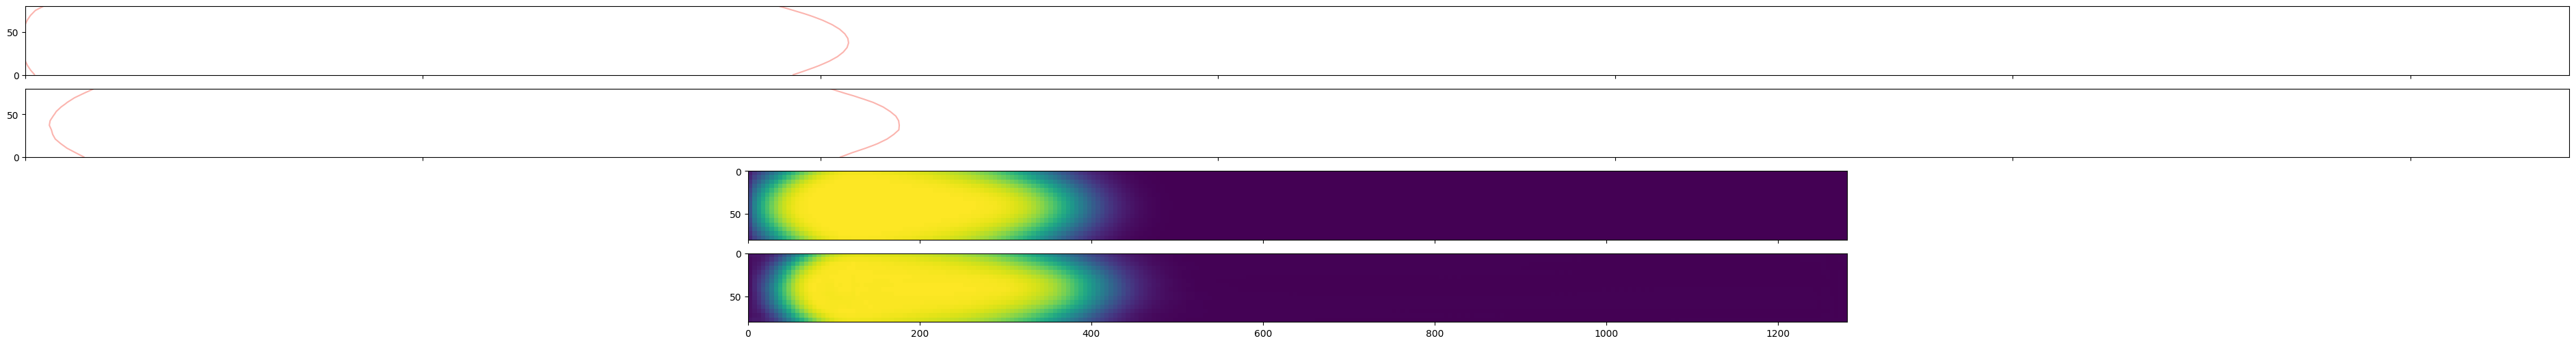

t_true length (max y): 0, width (max x): 0, max temp: 11.246920585632324
t_out length (max y): 0, width (max x): 0, max temp: 11.223888397216797


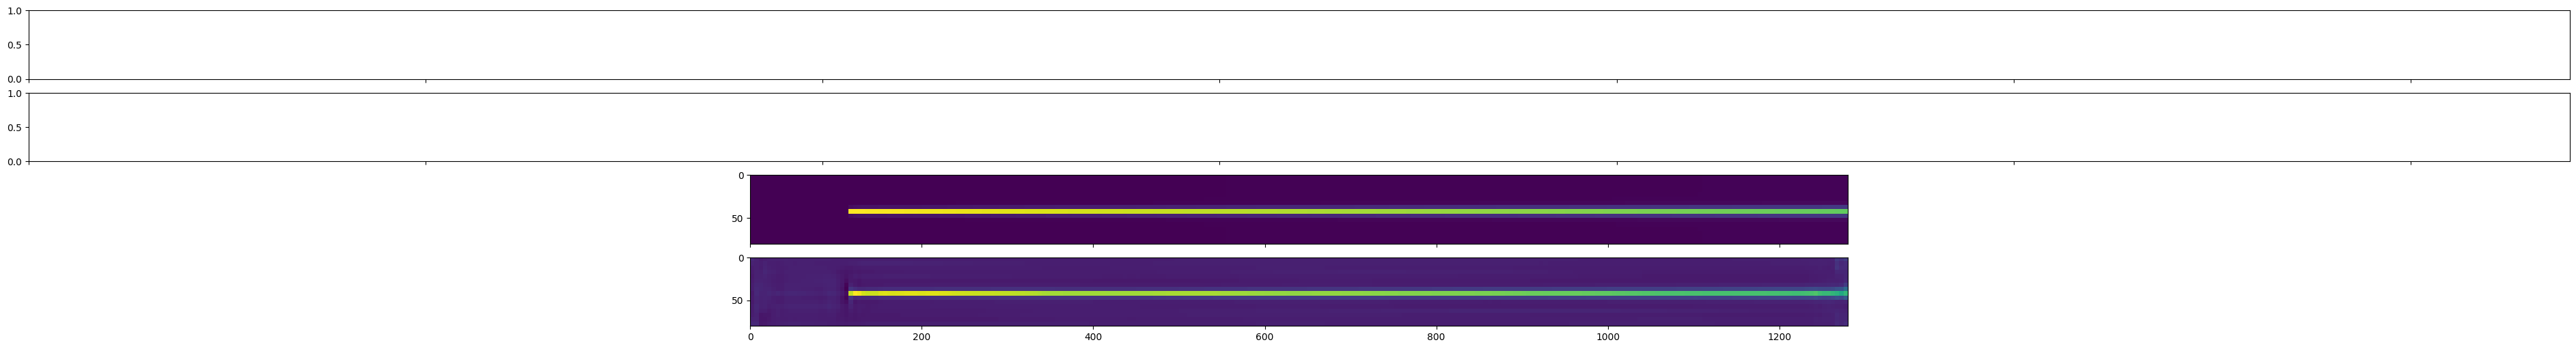

t_true length (max y): 1169.4338957740636, width (max x): 51.20290227387325, max temp: 15.562272071838379
t_out length (max y): 1169.7519732856426, width (max x): 46.79948349675095, max temp: 15.362129211425781


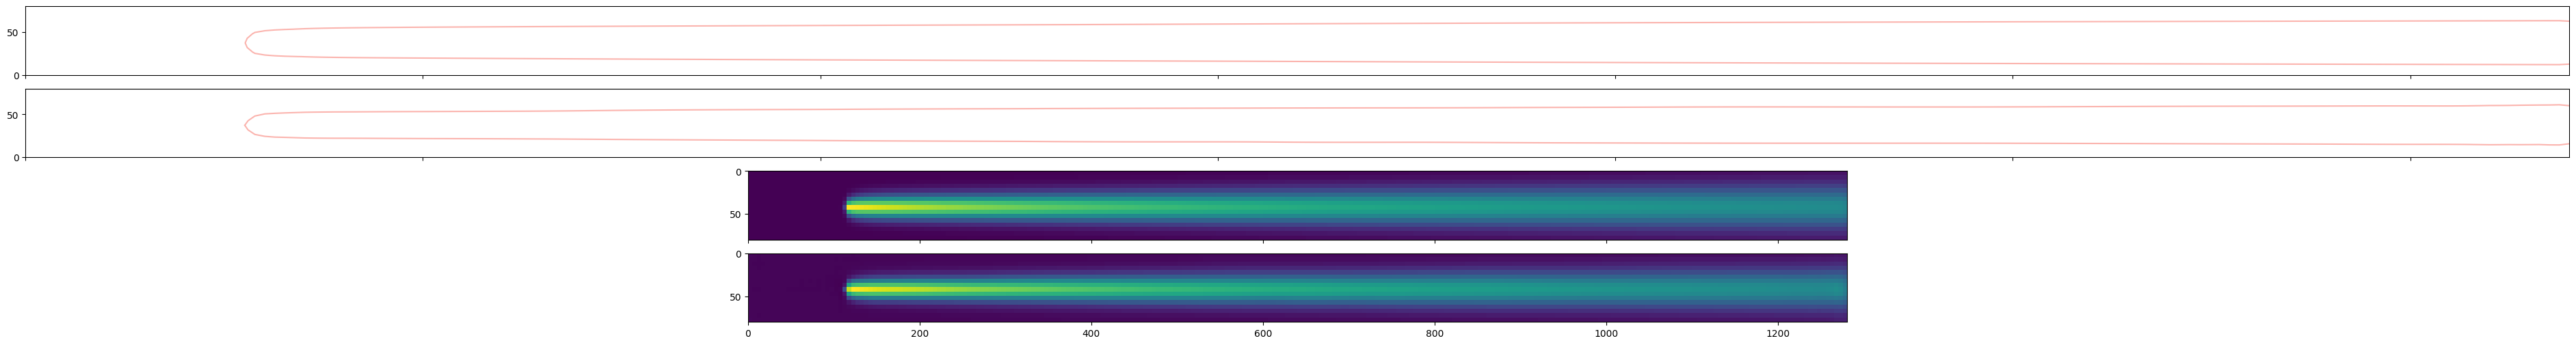

t_true length (max y): 965.3775325503069, width (max x): 72.53227965013413, max temp: 15.592888832092285
t_out length (max y): 1090.5441603975905, width (max x): 67.4429206629082, max temp: 15.831600189208984


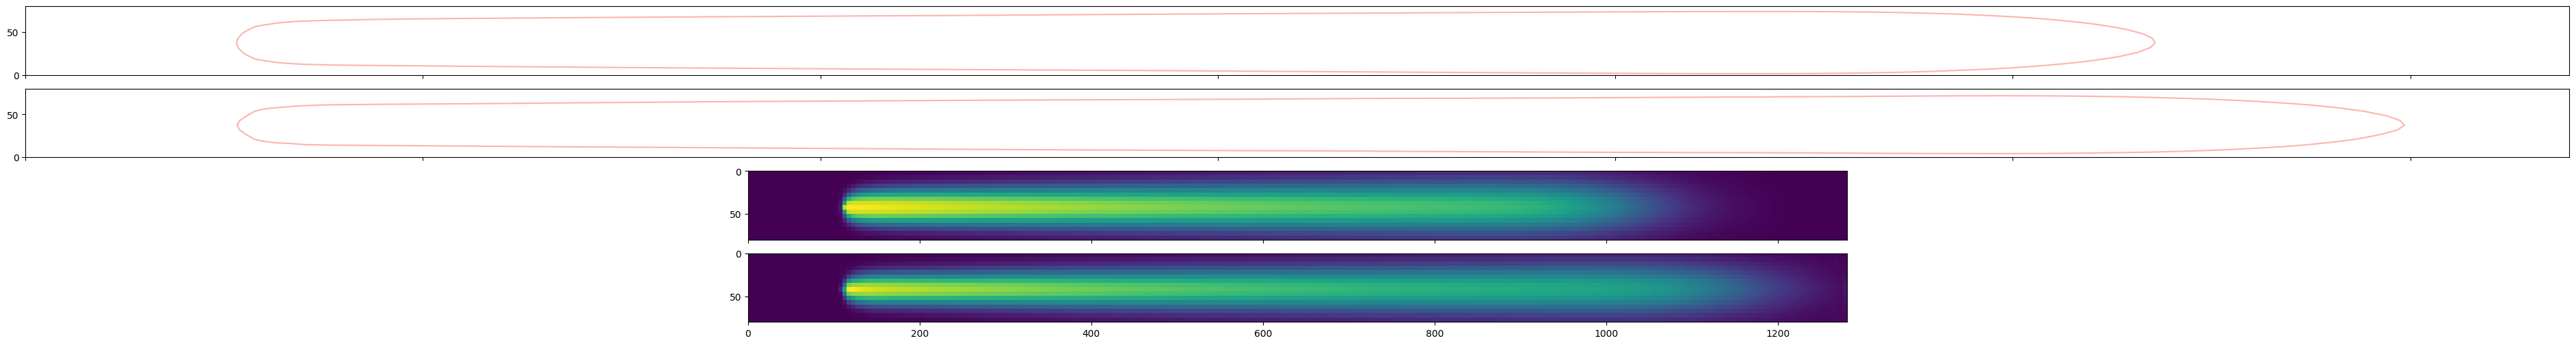

t_true length (max y): 610.5808979828946, width (max x): 80.0, max temp: 15.599892616271973
t_out length (max y): 663.835591527136, width (max x): 80.0, max temp: 15.8984956741333


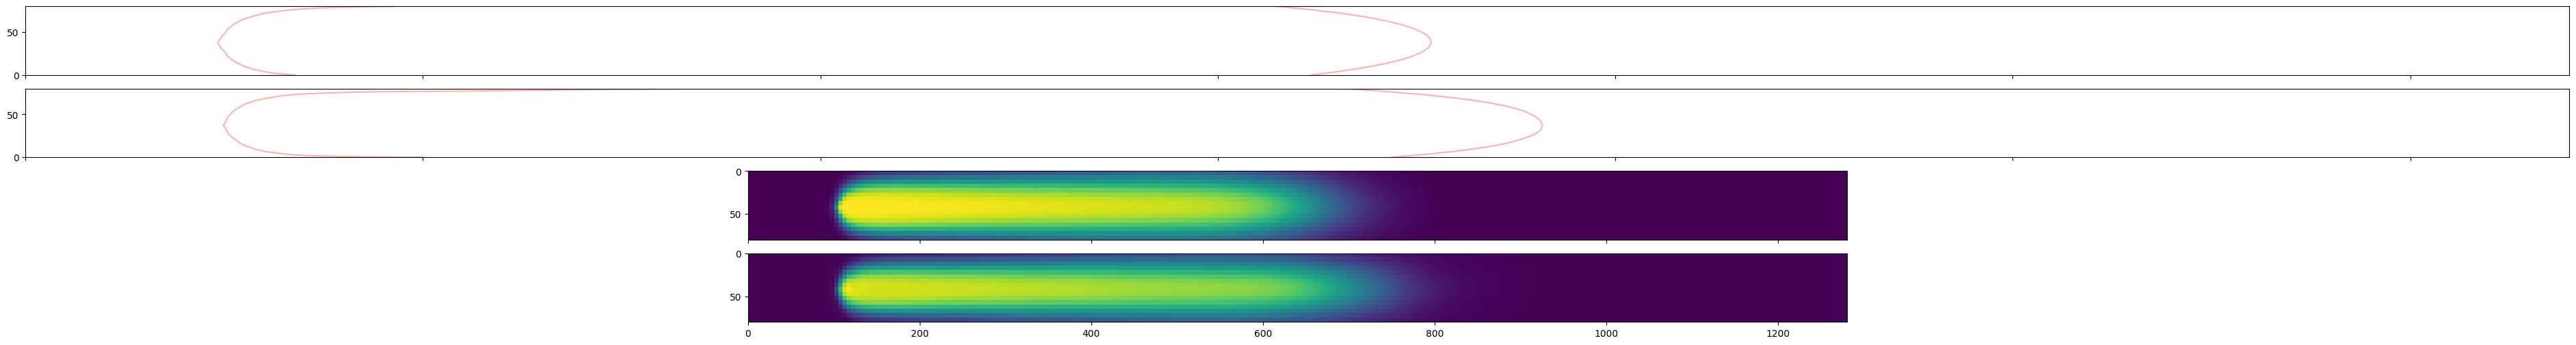

t_true length (max y): 0, width (max x): 0, max temp: 11.429624557495117
t_out length (max y): 0, width (max x): 0, max temp: 11.336246490478516


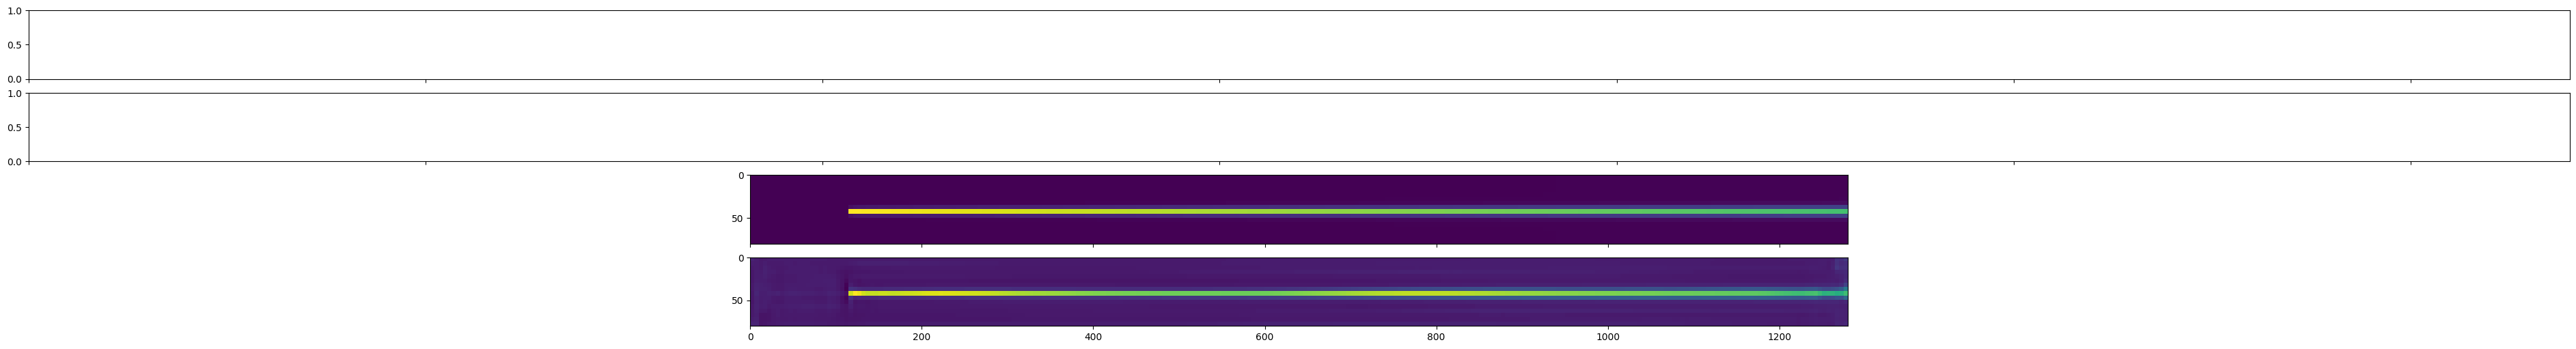

{'mean error in [°C]': 0.014398797078885965, 'max error in [°C]': 2.7612247467041016, 'mean squared error in [°C^2]': 0.1045094622434893, 'max squared error in [°C^2]': 7.624361991882324}
Experiment took 0.0 minutes 4.248188442987157 seconds


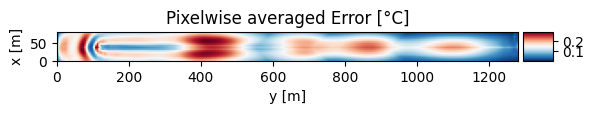

: 

In [103]:
args["dataset_name"] = "BENCHMARK_BOXES"
args["path_to_model"] = "best_models_paper/pksi1000/current_unet_dataset_2d_small_1000dp_pksi_v1"
args["inputs_prep"] = "pksi"

default_raw_dir, datasets_prepared_dir, dataset_prepared_full_path = set_paths(args["dataset_name"], args["inputs_prep"], args["name_extension"], args["case_2hp"])
args["datasets_path"] = datasets_prepared_dir
args["dataset_name"] += "_"+args["inputs_prep"] + args["name_extension"]

settings = SettingsTraining(**args)
if settings.name_folder_destination == "":
    settings.name_folder_destination = f"current_{settings.model_choice}_{settings.dataset_name}"
destination_dir = pathlib.Path(os.getcwd(), "runs", settings.name_folder_destination)
destination_dir.mkdir(parents=True, exist_ok=True)

settings.save()
run(settings)

In [20]:
lengths_sim = []
lengths_nn = []
widths_sim = []
widths_nn = []
max_temps_sim = []
max_temps_nn = []

# t_true length (max y): 0, width (max x): 0, max temp: 10.99206829071045
lengths_sim.append(0)
widths_sim.append(0)
max_temps_sim.append(10.99206829071045)
# t_out length (max y): 0, width (max x): 0, max temp: 10.964957237243652
lengths_nn.append(0)
widths_nn.append(0)
max_temps_nn.append(10.964957237243652)
# t_true length (max y): 610.5808979828946, width (max x): 80.0, max temp: 15.599892616271973
lengths_sim.append(610.5808979828946)
widths_sim.append(80.0)
max_temps_sim.append(15.599892616271973)
# t_out length (max y): 663.835591527136, width (max x): 80.0, max temp: 15.8984956741333
lengths_nn.append(663.835591527136)
widths_nn.append(80.0)
max_temps_nn.append(15.8984956741333)
# t_true length (max y): 757.8240923948172, width (max x): 80.0, max temp: 15.598639488220215
lengths_sim.append(757.8240923948172)
widths_sim.append(80.0)
max_temps_sim.append(15.598639488220215)
# t_out length (max y): 850.2005959440271, width (max x): 77.41551870771934, max temp: 15.971302032470703
lengths_nn.append(850.2005959440271)
widths_nn.append(77.41551870771934)
max_temps_nn.append(15.971302032470703)
# t_true length (max y): 0, width (max x): 0, max temp: 11.429624557495117
lengths_sim.append(0)
widths_sim.append(0)
max_temps_sim.append(11.429624557495117)
# t_out length (max y): 0, width (max x): 0, max temp: 11.336246490478516
lengths_nn.append(0)
widths_nn.append(0)
max_temps_nn.append(11.336246490478516)
# t_true length (max y): 1169.4338957740636, width (max x): 51.20290227387325, max temp: 15.562272071838379
lengths_sim.append(1169.4338957740636)
widths_sim.append(51.20290227387325)
max_temps_sim.append(15.562272071838379)
# t_out length (max y): 1169.7519732856426, width (max x): 46.79948349675095, max temp: 15.362129211425781
lengths_nn.append(1169.7519732856426)
widths_nn.append(46.79948349675095)
max_temps_nn.append(15.362129211425781)
# t_true length (max y): 440.6239549397085, width (max x): 80.0, max temp: 15.600377082824707
lengths_sim.append(440.6239549397085)
widths_sim.append(80.0)
max_temps_sim.append(15.600377082824707)
# t_out length (max y): 450.0055920995073, width (max x): 80.0, max temp: 15.63817024230957
lengths_nn.append(450.0055920995073)
widths_nn.append(80.0)
max_temps_nn.append(15.63817024230957)
# t_true length (max y): 414.16909726967936, width (max x): 80.0, max temp: 15.600358963012695
lengths_sim.append(414.16909726967936)
widths_sim.append(80.0)
max_temps_sim.append(15.600358963012695)
# t_out length (max y): 427.65859359333234, width (max x): 80.0, max temp: 15.630435943603516
lengths_nn.append(427.65859359333234)
widths_nn.append(80.0)
max_temps_nn.append(15.630435943603516)
# t_true length (max y): 965.3775325503069, width (max x): 72.53227965013413, max temp: 15.592888832092285
lengths_sim.append(965.3775325503069)
widths_sim.append(72.53227965013413)
max_temps_sim.append(15.592888832092285)
# t_out length (max y): 1090.5441603975905, width (max x): 67.4429206629082, max temp: 15.831600189208984
lengths_nn.append(1090.5441603975905)
widths_nn.append(67.4429206629082)
max_temps_nn.append(15.831600189208984)
# t_true length (max y): 0, width (max x): 0, max temp: 11.246920585632324
lengths_sim.append(0)
widths_sim.append(0)
max_temps_sim.append(11.246920585632324)
# t_out length (max y): 0, width (max x): 0, max temp: 11.223888397216797
lengths_nn.append(0)
widths_nn.append(0)
max_temps_nn.append(11.223888397216797)

overall(lengths_sim, lengths_nn, widths_sim, widths_nn, max_temps_sim, max_temps_nn)

len 0 0
width 0 0
len 0 0
width 0 0
len 0 0
width 0 0
overall length2: 4.37%
overall length1: 6.55% in 6 samples
overall width2: 2.09%
overall width1: 3.14% in 6 samples
overall max temp: 0.98% in 9 samples


# ogksi 1000

Converting:   0%|          | 0/9 [00:00<?, ?it/s]

Normalizing inputs:   0%|          | 0/9 [00:00<?, ?it/s]

Normalizing labels:   0%|          | 0/9 [00:00<?, ?it/s]

Dataset /home/pelzerja/pelzerja/test_nn/datasets_prepared/1HP_NN/BENCHMARK_BOXES_ogksi prepared


t_true length (max y): 414.16909726967936, width (max x): 80.0, max temp: 15.600358963012695
t_out length (max y): 415.4717919108805, width (max x): 80.0, max temp: 15.656765937805176


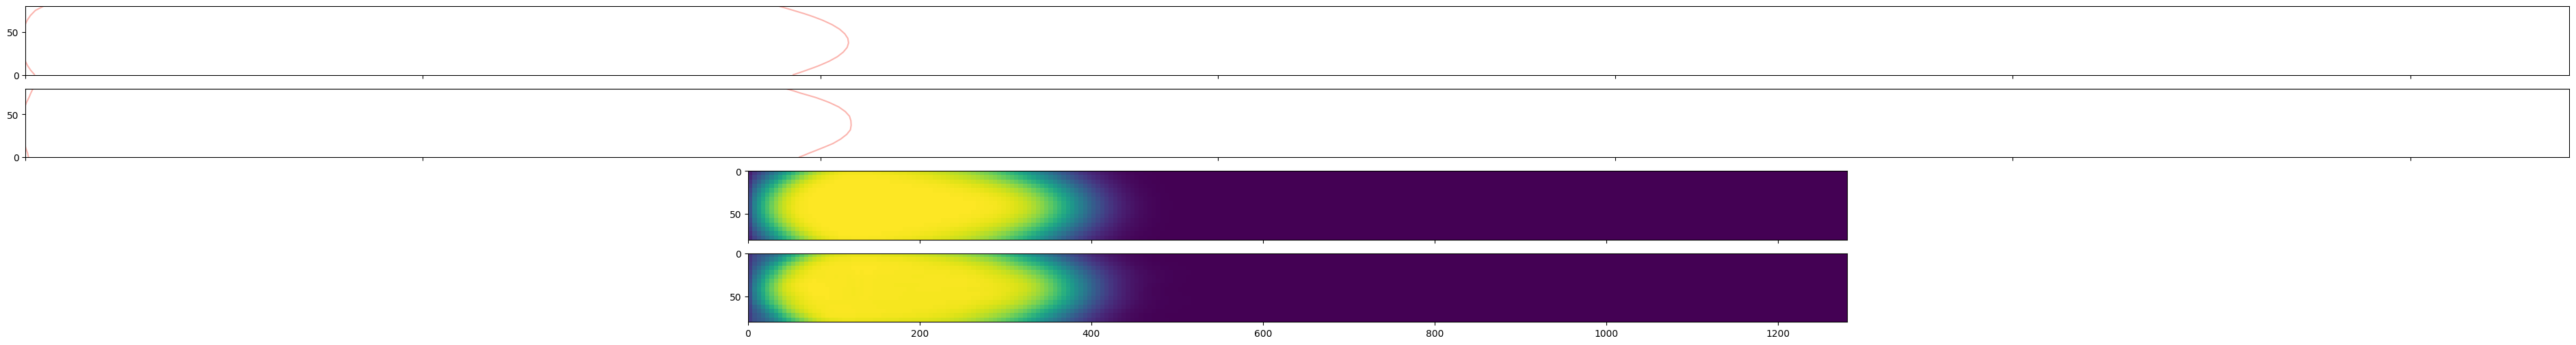

t_true length (max y): 440.6239549397085, width (max x): 80.0, max temp: 15.600377082824707
t_out length (max y): 442.6964978331053, width (max x): 80.0, max temp: 15.651124000549316


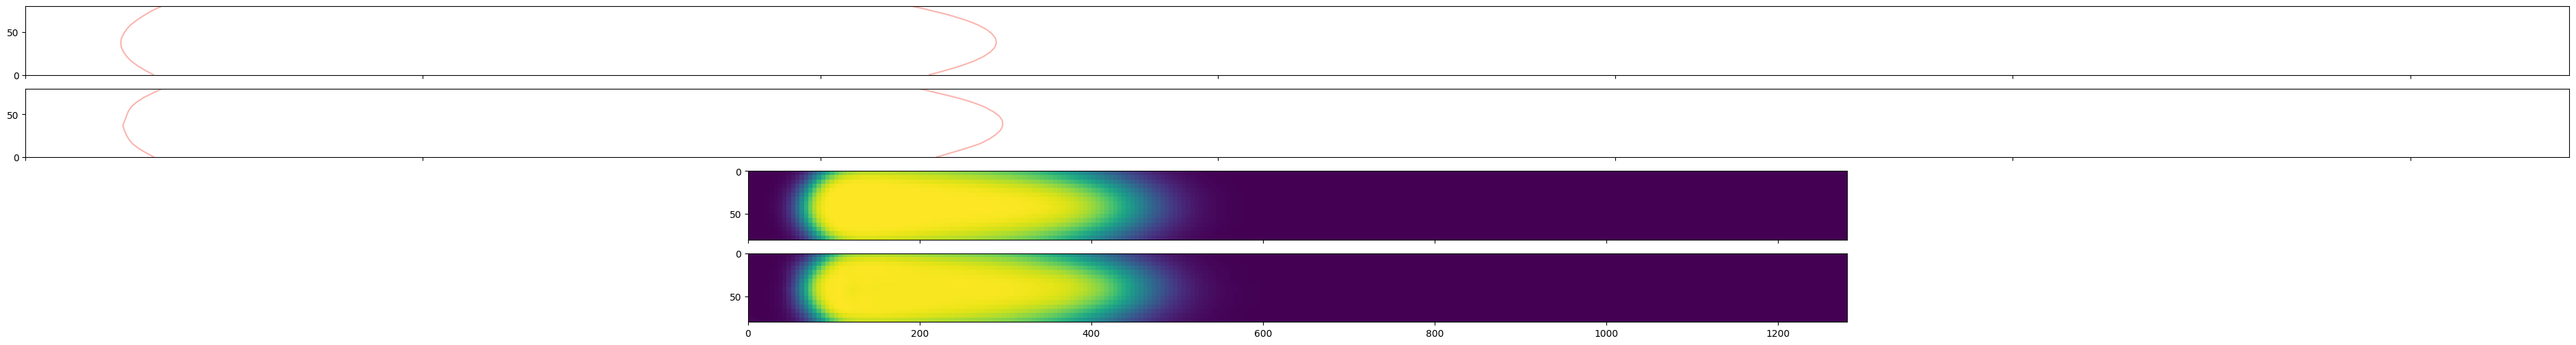

t_true length (max y): 0, width (max x): 0, max temp: 10.99206829071045
t_out length (max y): 0, width (max x): 0, max temp: 10.995504379272461


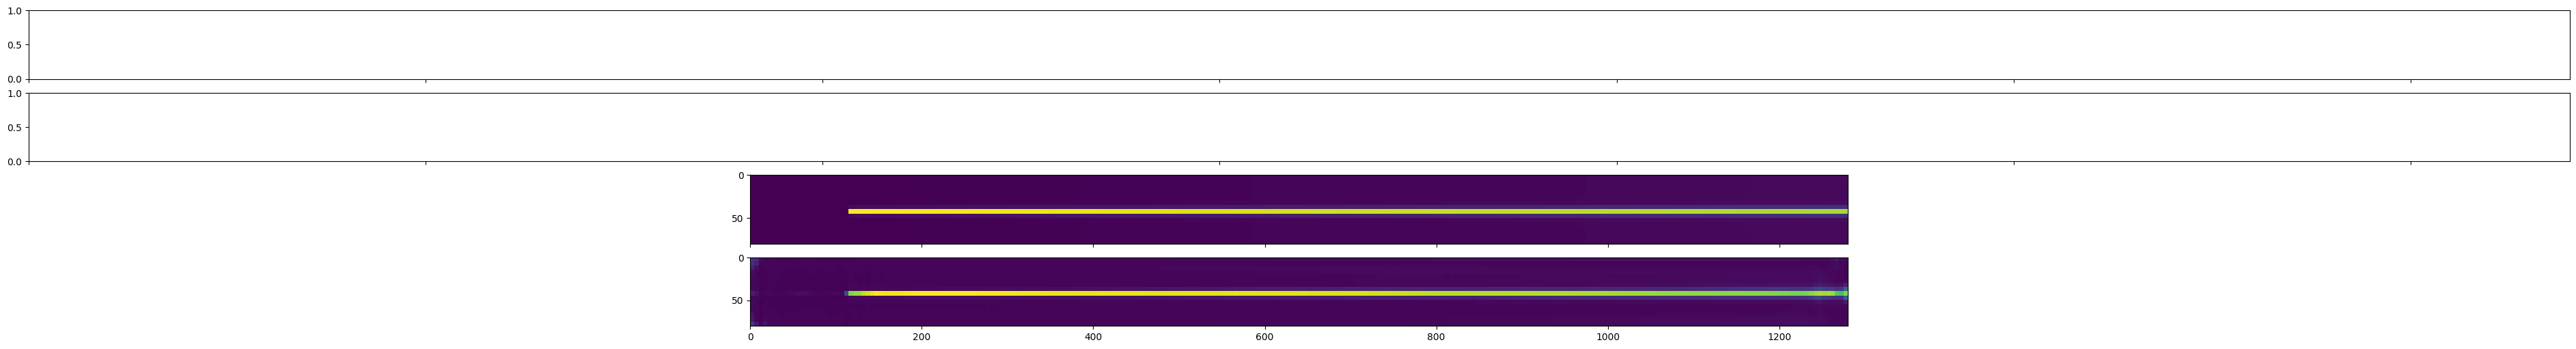

t_true length (max y): 1169.4338957740636, width (max x): 51.20290227387325, max temp: 15.562272071838379
t_out length (max y): 1171.1986432233791, width (max x): 52.019102969163015, max temp: 15.459253311157227


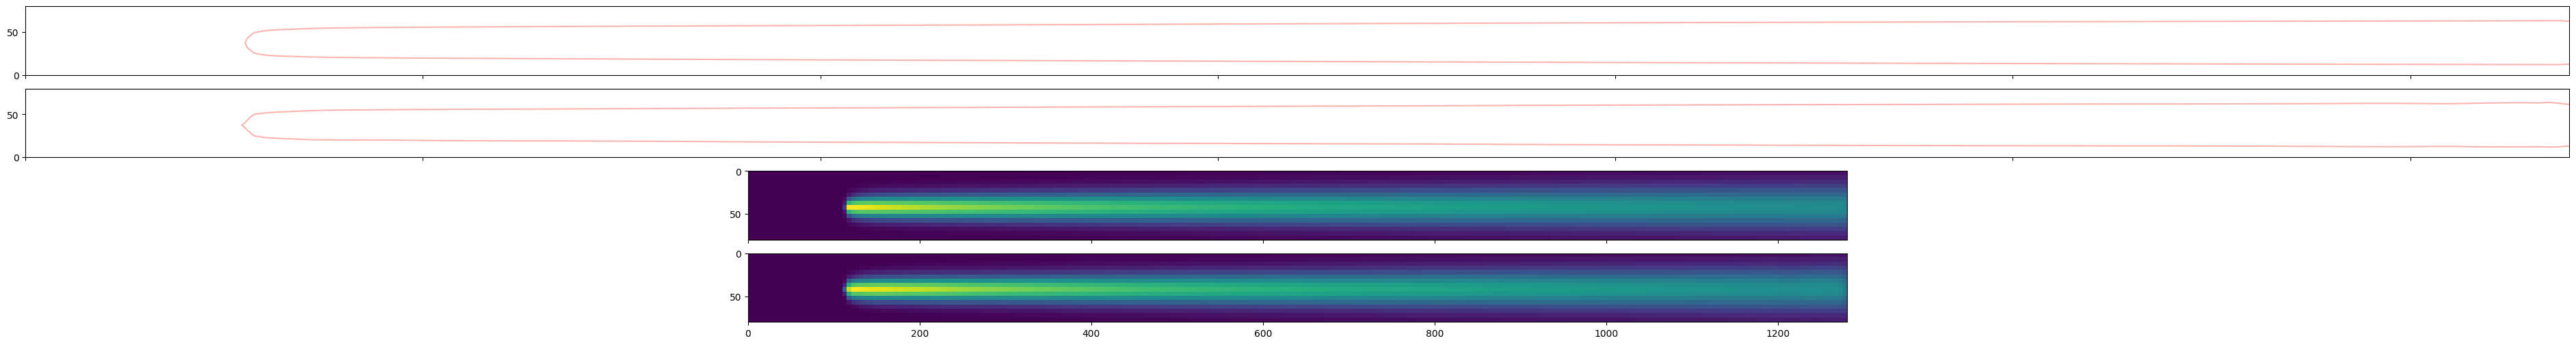

t_true length (max y): 965.3775325503069, width (max x): 72.53227965013413, max temp: 15.592888832092285
t_out length (max y): 967.716210876149, width (max x): 72.24067866319604, max temp: 15.902717590332031


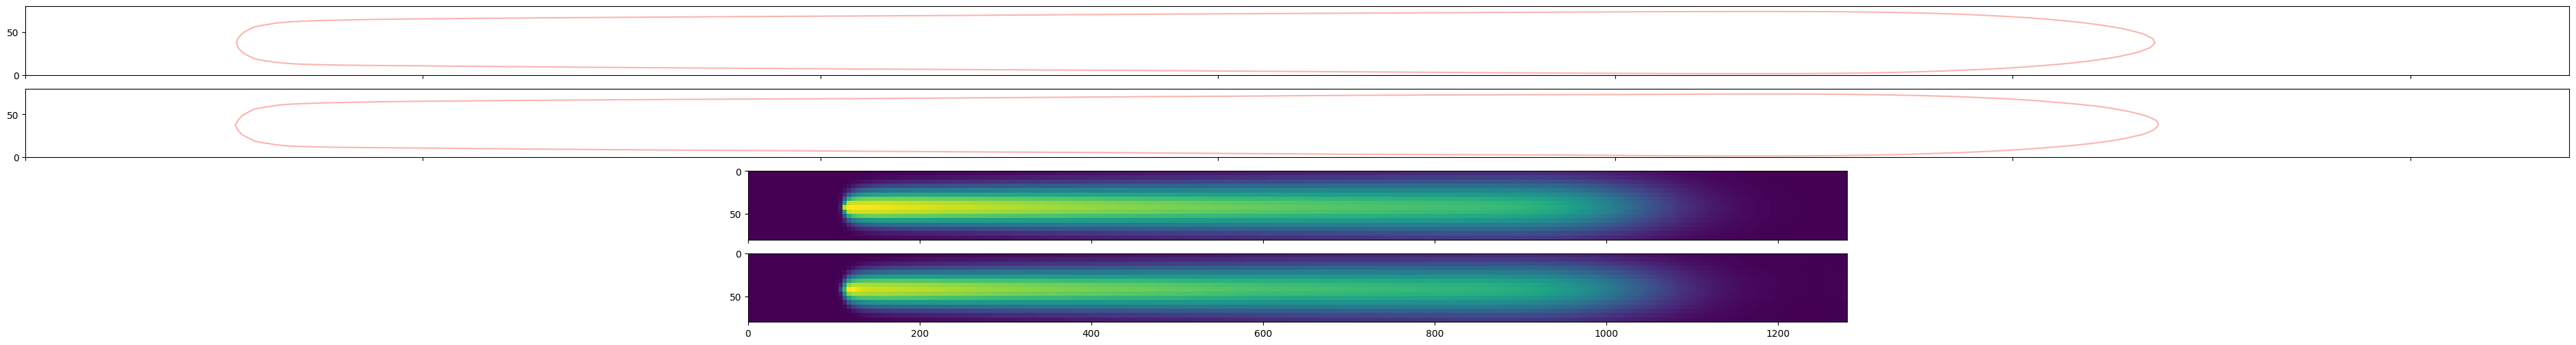

t_true length (max y): 757.8240923948172, width (max x): 80.0, max temp: 15.598639488220215
t_out length (max y): 763.6422849851358, width (max x): 80.0, max temp: 15.95511245727539


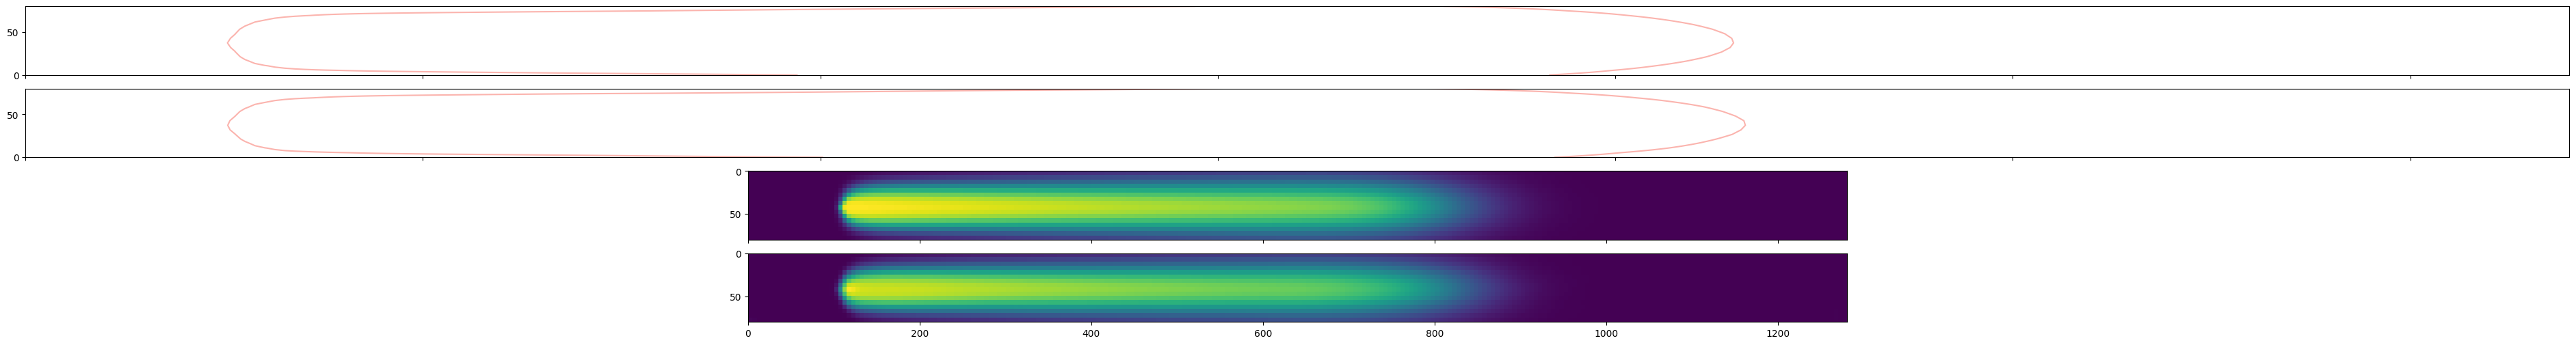

t_true length (max y): 0, width (max x): 0, max temp: 11.246920585632324
t_out length (max y): 0, width (max x): 0, max temp: 11.256794929504395


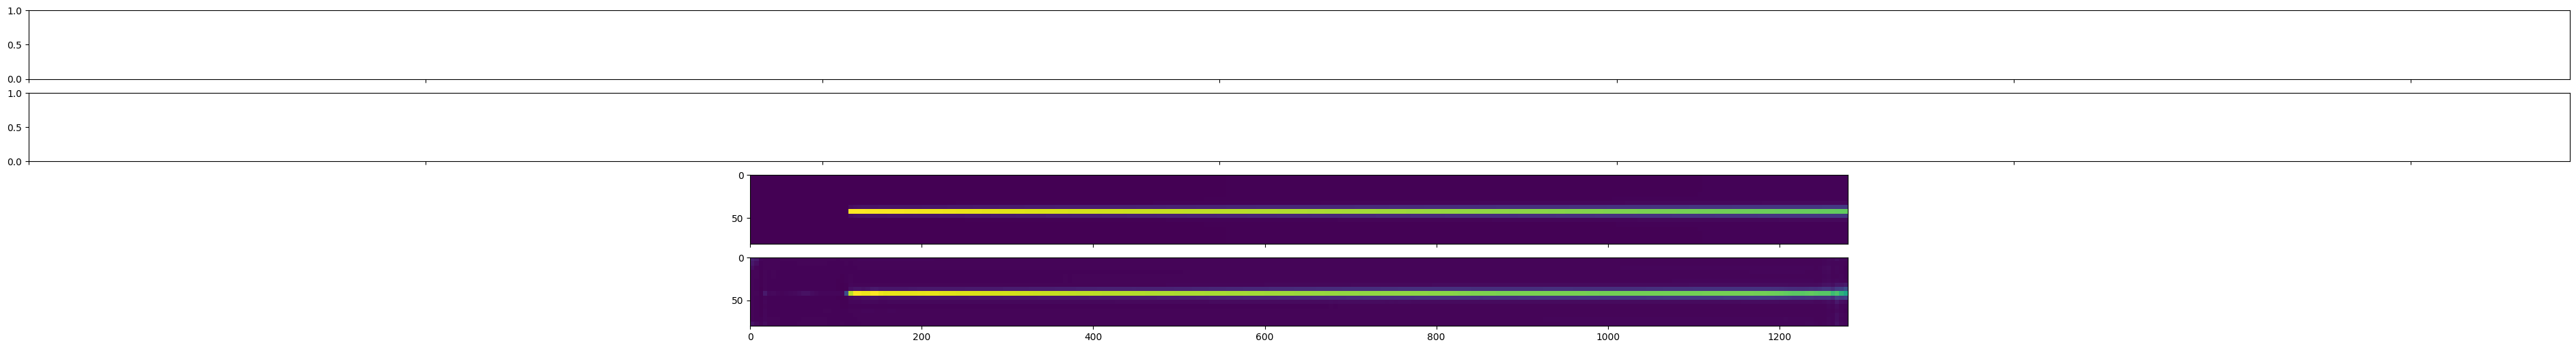

t_true length (max y): 610.5808979828946, width (max x): 80.0, max temp: 15.599892616271973
t_out length (max y): 613.2019090896267, width (max x): 80.0, max temp: 15.971443176269531


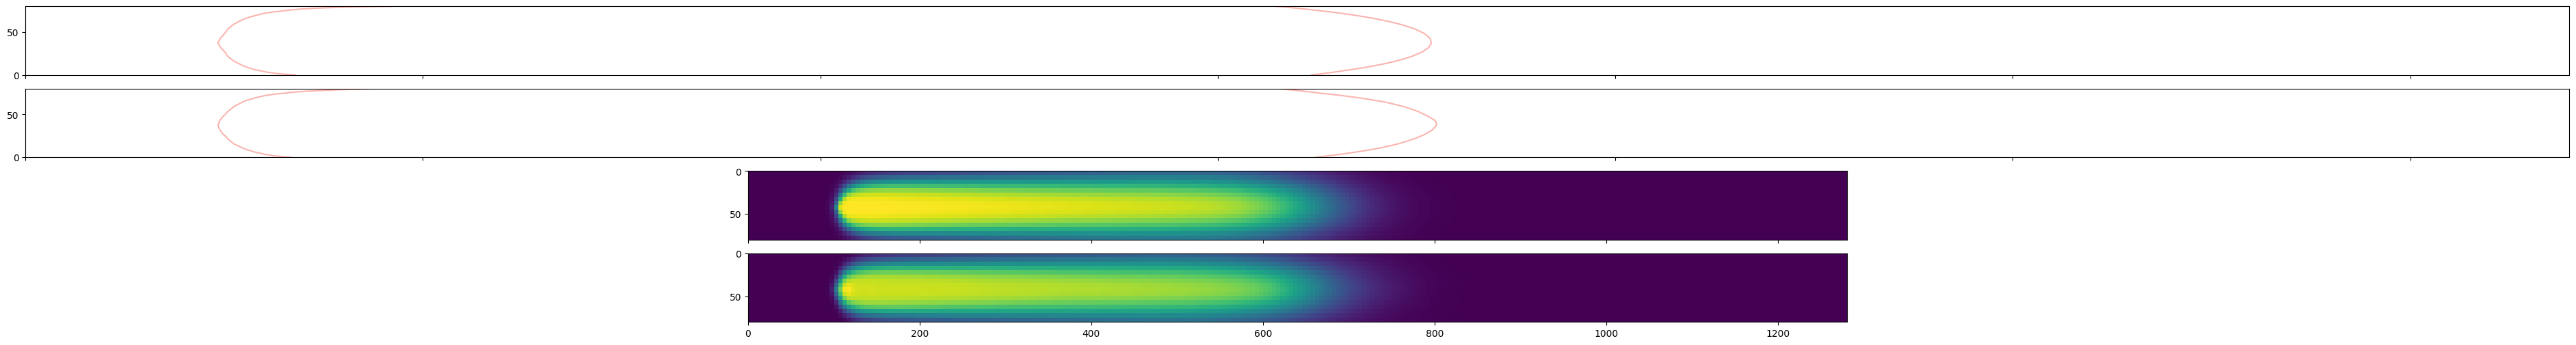

t_true length (max y): 0, width (max x): 0, max temp: 11.429624557495117
t_out length (max y): 0, width (max x): 0, max temp: 11.406761169433594


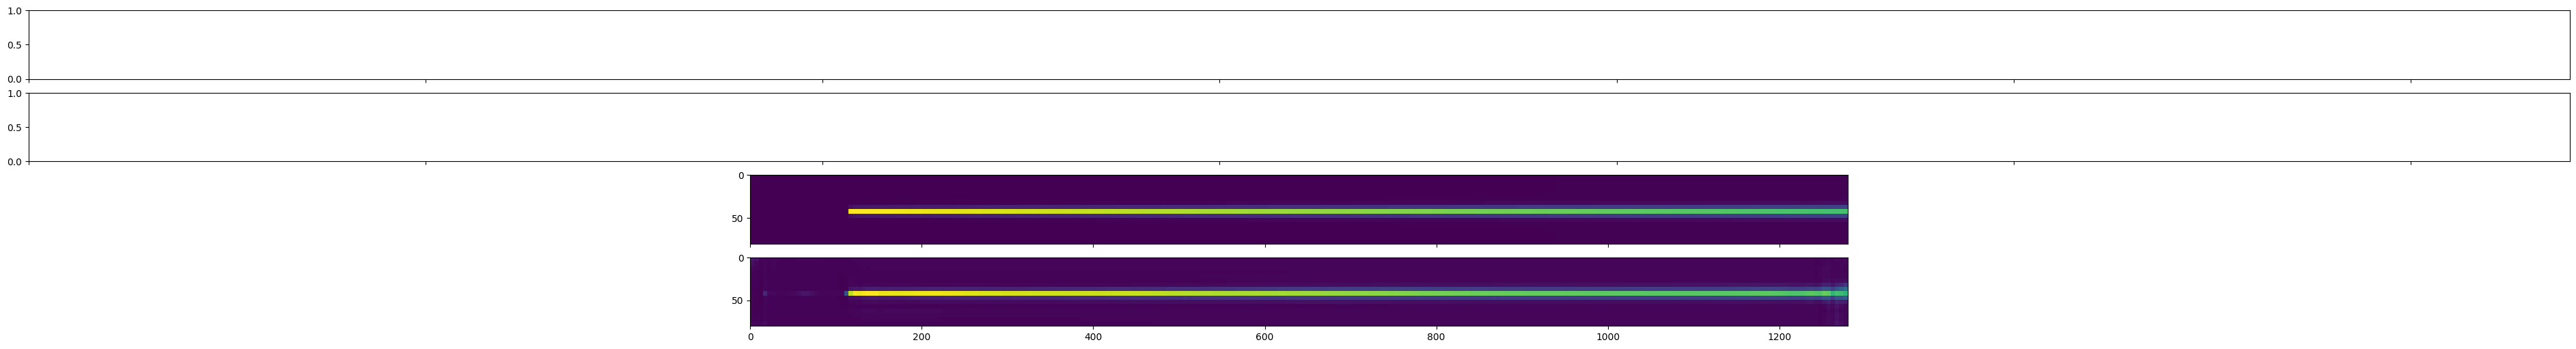

{'mean error in [°C]': -0.0009657795178807444, 'max error in [°C]': 0.9928998947143555, 'mean squared error in [°C^2]': 0.0007411446909423426, 'max squared error in [°C^2]': 0.9858502149581909}
Experiment took 0.0 minutes 3.9635027289914433 seconds


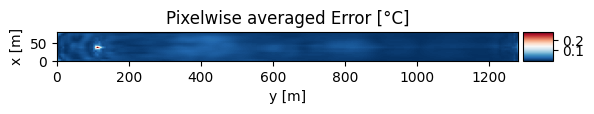

In [98]:
args["dataset_name"] = "BENCHMARK_BOXES"
args["path_to_model"] = "best_models_paper/ogksi1000/current_unet_dataset_2d_small_1000dp_v8"
args["inputs_prep"] = "ogksi"

default_raw_dir, datasets_prepared_dir, dataset_prepared_full_path = set_paths(args["dataset_name"], args["inputs_prep"], args["name_extension"], args["case_2hp"])
args["datasets_path"] = datasets_prepared_dir


# prepare dataset if not done yet OR if test=case do it anyways because of potentially different std,mean,... values than trained with
if not os.path.exists(dataset_prepared_full_path) or args["case"] == "test":
    time_begin = time.perf_counter()
    args_prep = {"raw_dir": default_raw_dir,
        "datasets_dir": datasets_prepared_dir,
        "dataset_name": args["dataset_name"],
        "inputs_prep": args["inputs_prep"],
        "name_extension": args["name_extension"]}
    args_prep = SettingsPrepare(**args_prep)

    if args["case"] == "test":
        # get info of training
        with open(os.path.join(os.getcwd(), "runs", args["path_to_model"], "info.yaml"), "r") as file:
            info = yaml.safe_load(file)
        prepare_dataset(args=args_prep, info=info)
    else:
        info = prepare_dataset(args=args_prep)
        if args.case == "train":
            # store info of training
            with open(os.path.join(os.getcwd(), "runs", args["name_folder_destination"], "info.yaml"), "w") as file:
                yaml.safe_dump(info, file)

    time_end = time.perf_counter() - time_begin
    with open(dataset_prepared_full_path + "/preparation_time.yaml", "w") as file:
        yaml.safe_dump(
            {"timestamp of end": time.ctime(), 
                "duration of whole process in seconds": time_end}
        , file)
        
    print(f"Dataset {dataset_prepared_full_path} prepared")

else:
    print(f"Dataset {dataset_prepared_full_path} already prepared")


args["dataset_name"] += "_"+args["inputs_prep"] + args["name_extension"]

settings = SettingsTraining(**args)
destination_dir = pathlib.Path(os.getcwd(), "runs", settings.name_folder_destination)
destination_dir.mkdir(parents=True, exist_ok=True)
settings.save()
run(settings)

In [21]:
lengths_sim = []
lengths_nn = []
widths_sim = []
widths_nn = []
max_temps_sim = []
max_temps_nn = []

# t_true length (max y): 0, width (max x): 0, max temp: 11.429624557495117
# t_out length (max y): 0, width (max x): 0, max temp: 11.406761169433594
lengths_sim.append(0)
widths_sim.append(0)
max_temps_sim.append(11.429624557495117)
lengths_nn.append(0)
widths_nn.append(0)
max_temps_nn.append(11.406761169433594)

# t_true length (max y): 0, width (max x): 0, max temp: 11.246920585632324
# t_out length (max y): 0, width (max x): 0, max temp: 11.256794929504395
lengths_sim.append(0)
widths_sim.append(0)
max_temps_sim.append(11.246920585632324)
lengths_nn.append(0)
widths_nn.append(0)
max_temps_nn.append(11.256794929504395)

# t_true length (max y): 1169.4338957740636, width (max x): 51.20290227387325, max temp: 15.562272071838379
# t_out length (max y): 1171.1986432233791, width (max x): 52.019102969163015, max temp: 15.459253311157227
lengths_sim.append(1169.4338957740636)
widths_sim.append(51.20290227387325)
max_temps_sim.append(15.562272071838379)
lengths_nn.append(1171.1986432233791)
widths_nn.append(52.019102969163015)
max_temps_nn.append(15.459253311157227)

# t_true length (max y): 414.16909726967936, width (max x): 80.0, max temp: 15.600358963012695
# t_out length (max y): 415.4717919108805, width (max x): 80.0, max temp: 15.656765937805176
lengths_sim.append(414.16909726967936)
widths_sim.append(80.0)
max_temps_sim.append(15.600358963012695)
lengths_nn.append(415.4717919108805)
widths_nn.append(80.0)
max_temps_nn.append(15.656765937805176)

# t_true length (max y): 610.5808979828946, width (max x): 80.0, max temp: 15.599892616271973
# t_out length (max y): 613.2019090896267, width (max x): 80.0, max temp: 15.971443176269531
lengths_sim.append(610.5808979828946)
widths_sim.append(80.0)
max_temps_sim.append(15.599892616271973)
lengths_nn.append(613.2019090896267)
widths_nn.append(80.0)
max_temps_nn.append(15.971443176269531)

# t_true length (max y): 965.3775325503069, width (max x): 72.53227965013413, max temp: 15.592888832092285
# t_out length (max y): 967.716210876149, width (max x): 72.24067866319604, max temp: 15.902717590332031
lengths_sim.append(965.3775325503069)
widths_sim.append(72.53227965013413)
max_temps_sim.append(15.592888832092285)
lengths_nn.append(967.716210876149)
widths_nn.append(72.24067866319604)
max_temps_nn.append(15.902717590332031)

# t_true length (max y): 757.8240923948172, width (max x): 80.0, max temp: 15.598639488220215
# t_out length (max y): 763.6422849851358, width (max x): 80.0, max temp: 15.95511245727539
lengths_sim.append(757.8240923948172)
widths_sim.append(80.0)
max_temps_sim.append(15.598639488220215)
lengths_nn.append(763.6422849851358)
widths_nn.append(80.0)
max_temps_nn.append(15.95511245727539)

# t_true length (max y): 440.6239549397085, width (max x): 80.0, max temp: 15.600377082824707
# t_out length (max y): 442.6964978331053, width (max x): 80.0, max temp: 15.651124000549316
lengths_sim.append(440.6239549397085)
widths_sim.append(80.0)
max_temps_sim.append(15.600377082824707)
lengths_nn.append(442.6964978331053)
widths_nn.append(80.0)
max_temps_nn.append(15.651124000549316)

# t_true length (max y): 0, width (max x): 0, max temp: 10.99206829071045
# t_out length (max y): 0, width (max x): 0, max temp: 10.995504379272461
lengths_sim.append(0)
widths_sim.append(0)
max_temps_sim.append(10.99206829071045)
lengths_nn.append(0)
widths_nn.append(0)
max_temps_nn.append(10.995504379272461)

overall(lengths_sim, lengths_nn, widths_sim, widths_nn, max_temps_sim, max_temps_nn)


len 0 0
width 0 0
len 0 0
width 0 0
len 0 0
width 0 0
overall length2: 0.26%
overall length1: 0.4% in 6 samples
overall width2: 0.22%
overall width1: 0.33% in 6 samples
overall max temp: 0.92% in 9 samples


v1: 
overall length: 33.6%, overall width: 33.56%, overall max-temp: 0.92%

v2: 
overall length: 0.4% in 6 samples
overall width: 0.33% in 6 samples
overall max temp: 0.92% in 9 samples

# gksi 1000

In [17]:
args["dataset_name"] = "BENCHMARK_BOXES"
args["path_to_model"] = "exp_several_starts/current_unet_dataset_2d_small_1000dp_gksi_v4"
args["inputs_prep"] = "gksi"

default_raw_dir, datasets_prepared_dir, dataset_prepared_full_path = set_paths(args["dataset_name"], args["inputs_prep"], args["name_extension"], args["case_2hp"])
args["datasets_path"] = datasets_prepared_dir
args["dataset_name"] += "_"+args["inputs_prep"] + args["name_extension"]

settings = SettingsTraining(**args)
if settings.name_folder_destination == "":
    settings.name_folder_destination = f"current_{settings.model_choice}_{settings.dataset_name}"
destination_dir = pathlib.Path(os.getcwd(), "runs", settings.name_folder_destination)
destination_dir.mkdir(parents=True, exist_ok=True)

settings.save()
run(settings)

t_true length (max y): 440.6239549397085, width (max x): 80.0, max temp: 15.600377082824707
t_out length (max y): 454.7216721525384, width (max x): 80.0, max temp: 15.628606796264648
t_true length (max y): 0, width (max x): 0, max temp: 11.429624557495117
t_out length (max y): 0, width (max x): 0, max temp: 11.332803726196289
t_true length (max y): 610.5808979828946, width (max x): 80.0, max temp: 15.599892616271973
t_out length (max y): 675.3339697345942, width (max x): 80.0, max temp: 15.869483947753906
t_true length (max y): 0, width (max x): 0, max temp: 10.99206829071045
t_out length (max y): 0, width (max x): 0, max temp: 10.946187973022461
t_true length (max y): 965.3775325503069, width (max x): 72.53227965013413, max temp: 15.592888832092285
t_out length (max y): 1105.7943195973335, width (max x): 66.4172555115338, max temp: 15.707765579223633
t_true length (max y): 1169.4338957740636, width (max x): 51.20290227387325, max temp: 15.562272071838379
t_out length (max y): 1169.051

In [22]:
lengths_sim = []
lengths_nn = []
widths_sim = []
widths_nn = []
max_temps_sim = []
max_temps_nn = []

# t_true length (max y): 440.6239549397085, width (max x): 80.0, max temp: 15.600377082824707
# t_out length (max y): 454.7216721525384, width (max x): 80.0, max temp: 15.628606796264648
lengths_sim.append(440.6239549397085)
widths_sim.append(80.0)
max_temps_sim.append(15.600377082824707)
lengths_nn.append(454.7216721525384)
widths_nn.append(80.0)
max_temps_nn.append(15.628606796264648)

# t_true length (max y): 0, width (max x): 0, max temp: 11.429624557495117
# t_out length (max y): 0, width (max x): 0, max temp: 11.332803726196289
lengths_sim.append(0)
widths_sim.append(0)
max_temps_sim.append(11.429624557495117)
lengths_nn.append(0)
widths_nn.append(0)
max_temps_nn.append(11.332803726196289)

# t_true length (max y): 610.5808979828946, width (max x): 80.0, max temp: 15.599892616271973
# t_out length (max y): 675.3339697345942, width (max x): 80.0, max temp: 15.869483947753906
lengths_sim.append(610.5808979828946)
widths_sim.append(80.0)
max_temps_sim.append(15.599892616271973)
lengths_nn.append(675.3339697345942)
widths_nn.append(80.0)
max_temps_nn.append(15.869483947753906)

# t_true length (max y): 0, width (max x): 0, max temp: 10.99206829071045
# t_out length (max y): 0, width (max x): 0, max temp: 10.946187973022461
lengths_sim.append(0)
widths_sim.append(0)
max_temps_sim.append(10.99206829071045)
lengths_nn.append(0)
widths_nn.append(0)
max_temps_nn.append(10.946187973022461)

# t_true length (max y): 965.3775325503069, width (max x): 72.53227965013413, max temp: 15.592888832092285
# t_out length (max y): 1105.7943195973335, width (max x): 66.4172555115338, max temp: 15.707765579223633
lengths_sim.append(965.3775325503069)
widths_sim.append(72.53227965013413)
max_temps_sim.append(15.592888832092285)
lengths_nn.append(1105.7943195973335)
widths_nn.append(66.4172555115338)
max_temps_nn.append(15.707765579223633)

# t_true length (max y): 1169.4338957740636, width (max x): 51.20290227387325, max temp: 15.562272071838379
# t_out length (max y): 1169.051468568135, width (max x): 46.9292209577122, max temp: 15.273755073547363
lengths_sim.append(1169.4338957740636)
widths_sim.append(51.20290227387325)
max_temps_sim.append(15.562272071838379)
lengths_nn.append(1169.051468568135)
widths_nn.append(46.9292209577122)
max_temps_nn.append(15.273755073547363)

# t_true length (max y): 0, width (max x): 0, max temp: 11.246920585632324
# t_out length (max y): 0, width (max x): 0, max temp: 11.152914047241211
lengths_sim.append(0)
widths_sim.append(0)
max_temps_sim.append(11.246920585632324)
lengths_nn.append(0)
widths_nn.append(0)
max_temps_nn.append(11.152914047241211)

# t_true length (max y): 414.16909726967936, width (max x): 80.0, max temp: 15.600358963012695
# t_out length (max y): 436.53985848541214, width (max x): 80.0, max temp: 15.614595413208008
lengths_sim.append(414.16909726967936)
widths_sim.append(80.0)
max_temps_sim.append(15.600358963012695)
lengths_nn.append(436.53985848541214)
widths_nn.append(80.0)
max_temps_nn.append(15.614595413208008)

# t_true length (max y): 757.8240923948172, width (max x): 80.0, max temp: 15.598639488220215
# t_out length (max y): 870.6958859831282, width (max x): 77.25924770206561, max temp: 15.757733345031738
lengths_sim.append(757.8240923948172)
widths_sim.append(80.0)
max_temps_sim.append(15.598639488220215)
lengths_nn.append(870.6958859831282)
widths_nn.append(77.25924770206561)
max_temps_nn.append(15.757733345031738)

overall(lengths_sim, lengths_nn, widths_sim, widths_nn, max_temps_sim, max_temps_nn)


len 0 0
width 0 0
len 0 0
width 0 0
len 0 0
width 0 0
overall length2: 5.41%
overall length1: 8.11% in 6 samples
overall width2: 2.24%
overall width1: 3.37% in 6 samples
overall max temp: 0.86% in 9 samples


# pksi 100

Converting:   0%|          | 0/9 [00:00<?, ?it/s]

Normalizing inputs:   0%|          | 0/9 [00:00<?, ?it/s]

Normalizing labels:   0%|          | 0/9 [00:00<?, ?it/s]

Dataset /home/pelzerja/pelzerja/test_nn/datasets_prepared/1HP_NN/BENCHMARK_BOXES_pksi prepared


t_true length (max y): 0, width (max x): 0, max temp: 10.99206829071045
t_out length (max y): 0, width (max x): 0, max temp: 11.009879112243652


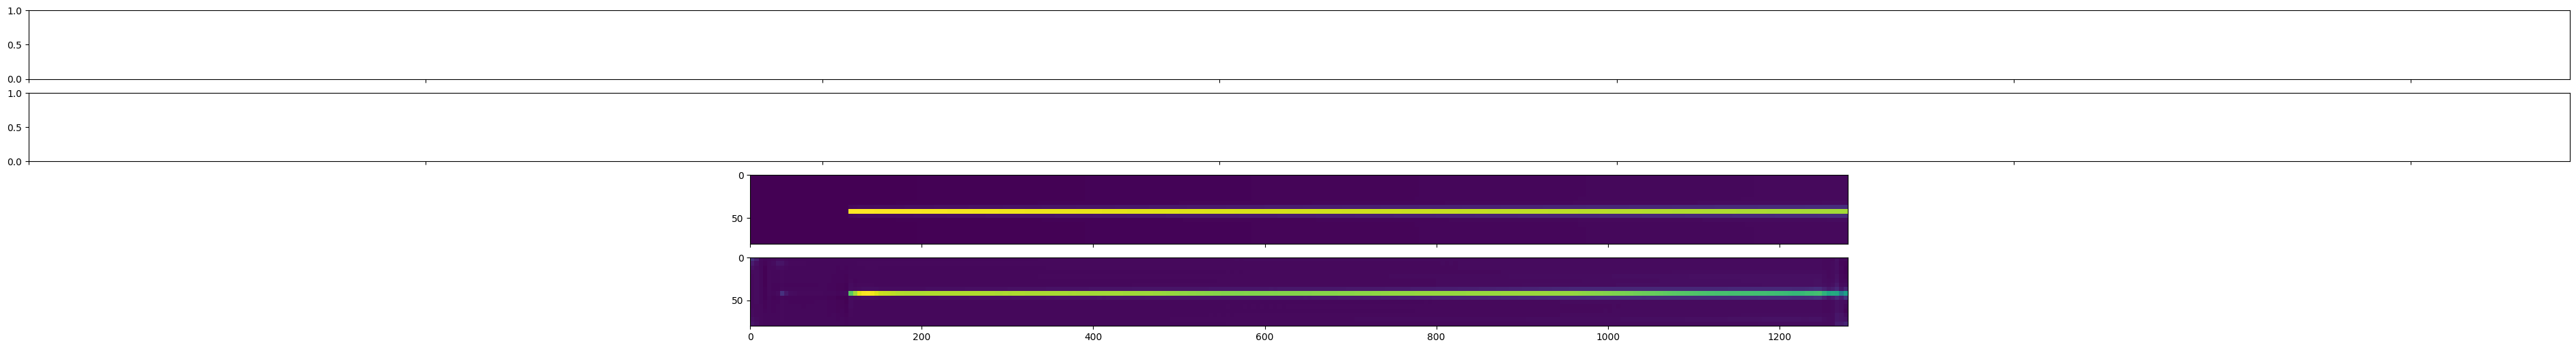

t_true length (max y): 0, width (max x): 0, max temp: 11.246920585632324
t_out length (max y): 0, width (max x): 0, max temp: 11.27147102355957


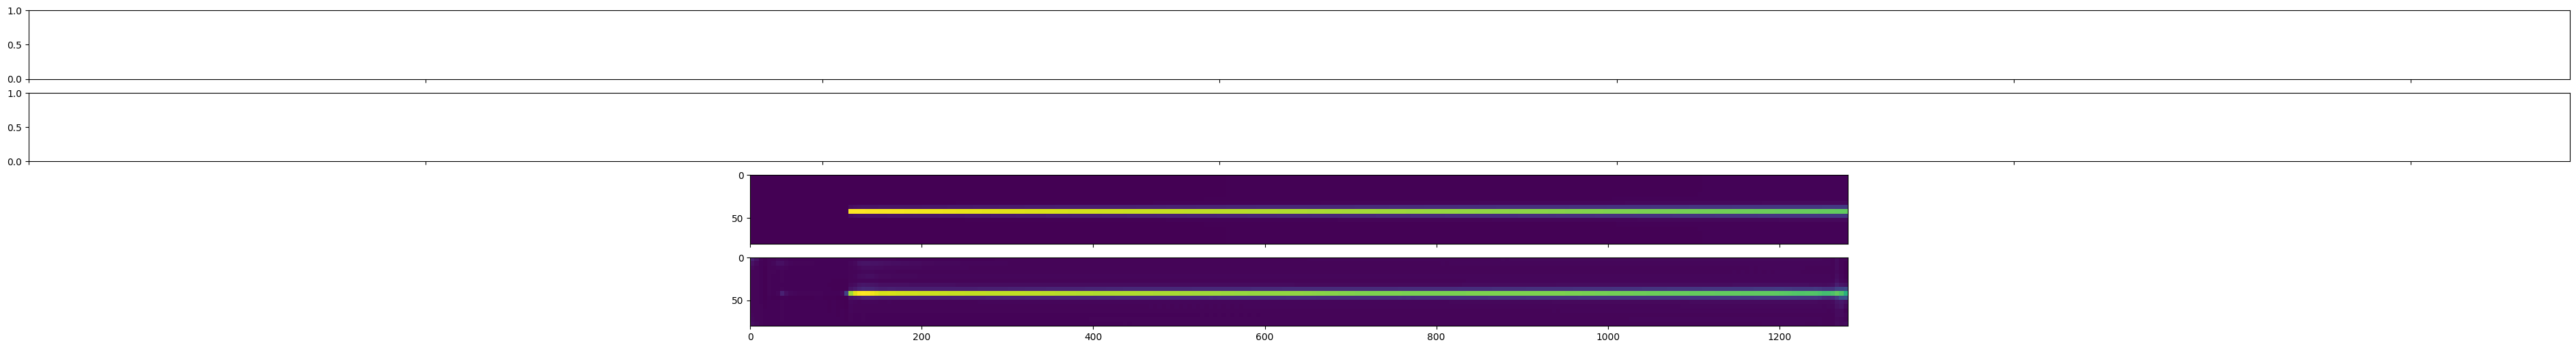

t_true length (max y): 610.5808979828946, width (max x): 80.0, max temp: 15.599892616271973
t_out length (max y): 614.5305353183638, width (max x): 80.0, max temp: 15.868898391723633


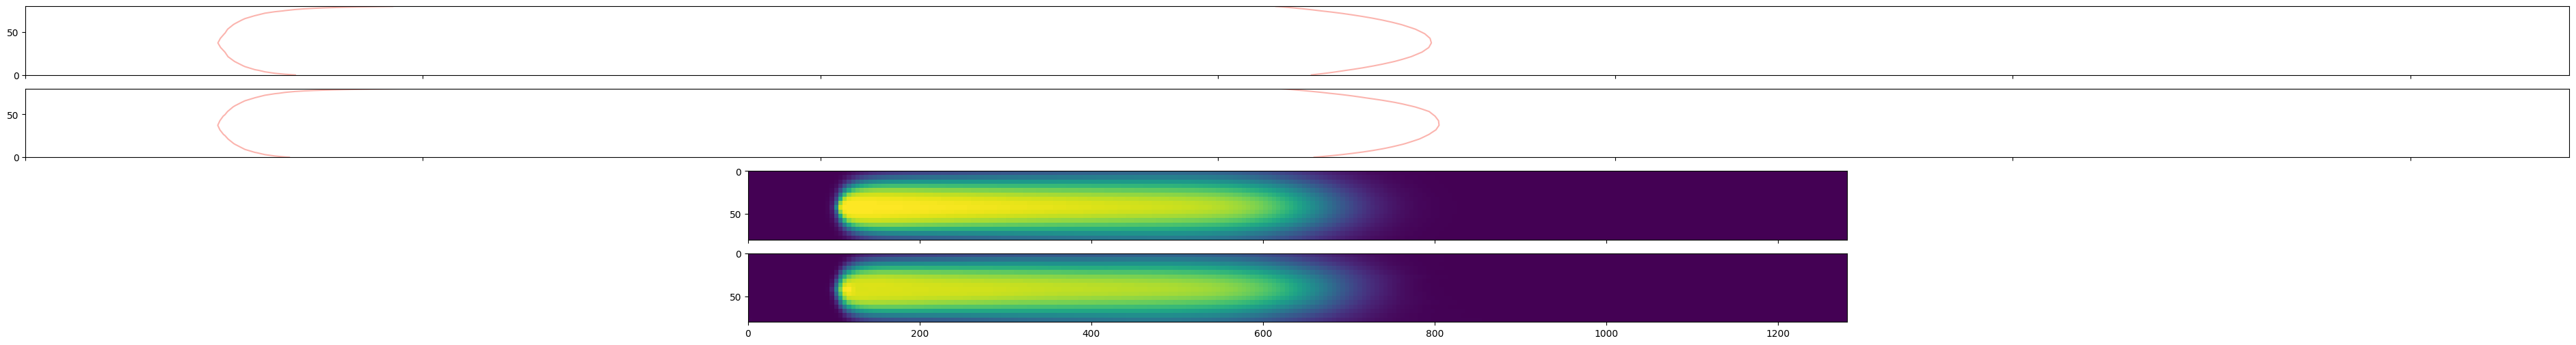

t_true length (max y): 0, width (max x): 0, max temp: 11.429624557495117
t_out length (max y): 0, width (max x): 0, max temp: 11.425600051879883


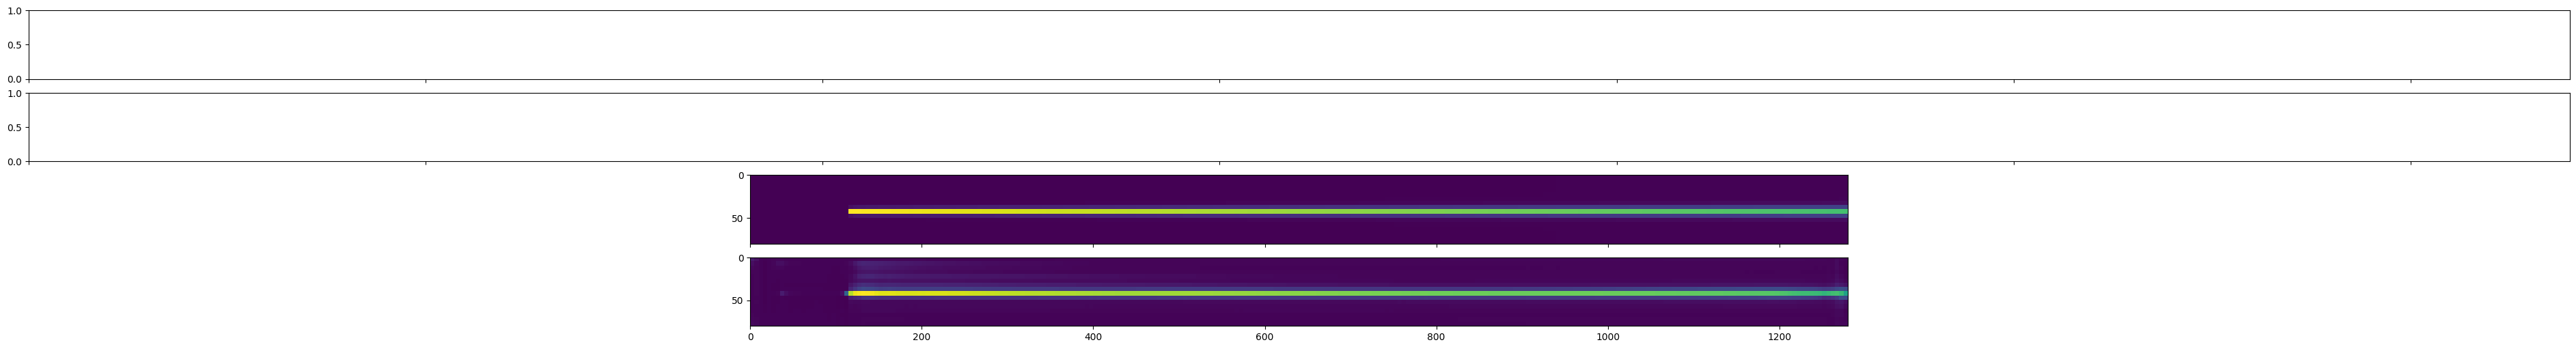

t_true length (max y): 965.3775325503069, width (max x): 72.53227965013413, max temp: 15.592888832092285
t_out length (max y): 964.3794480910087, width (max x): 73.0825080123085, max temp: 15.881373405456543


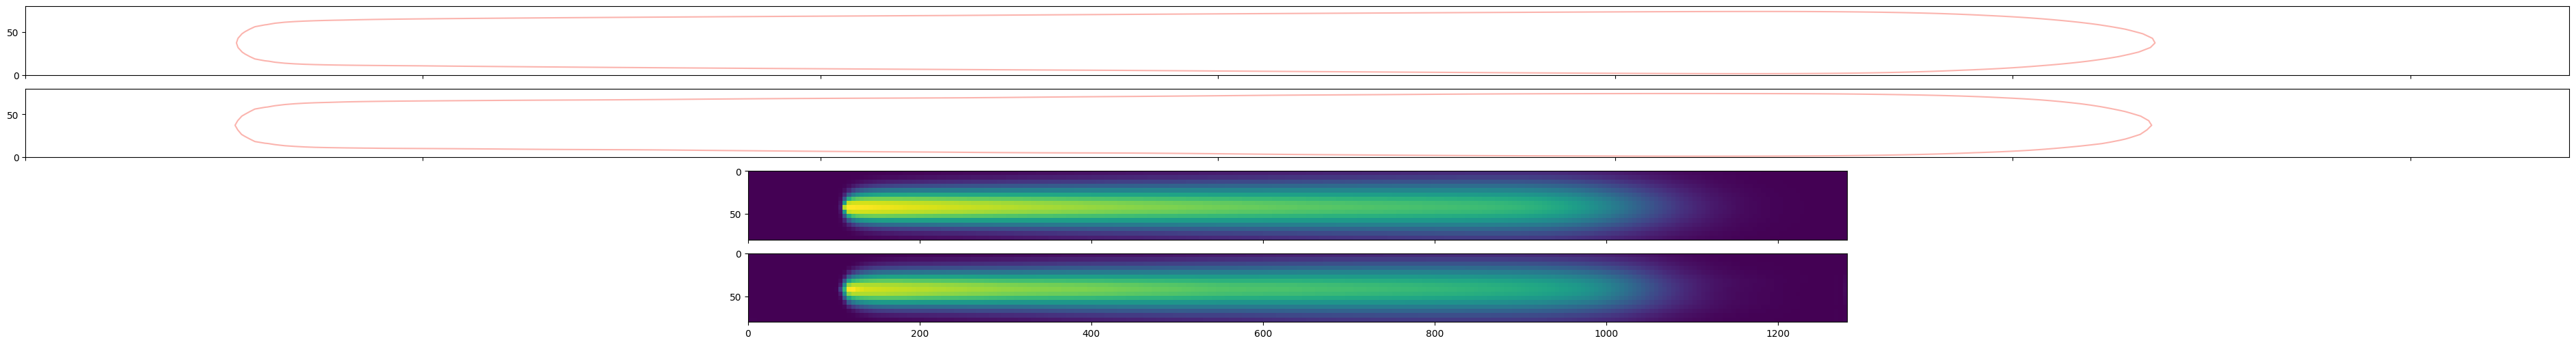

t_true length (max y): 757.8240923948172, width (max x): 80.0, max temp: 15.598639488220215
t_out length (max y): 793.5600377926024, width (max x): 79.13199182613423, max temp: 16.047576904296875


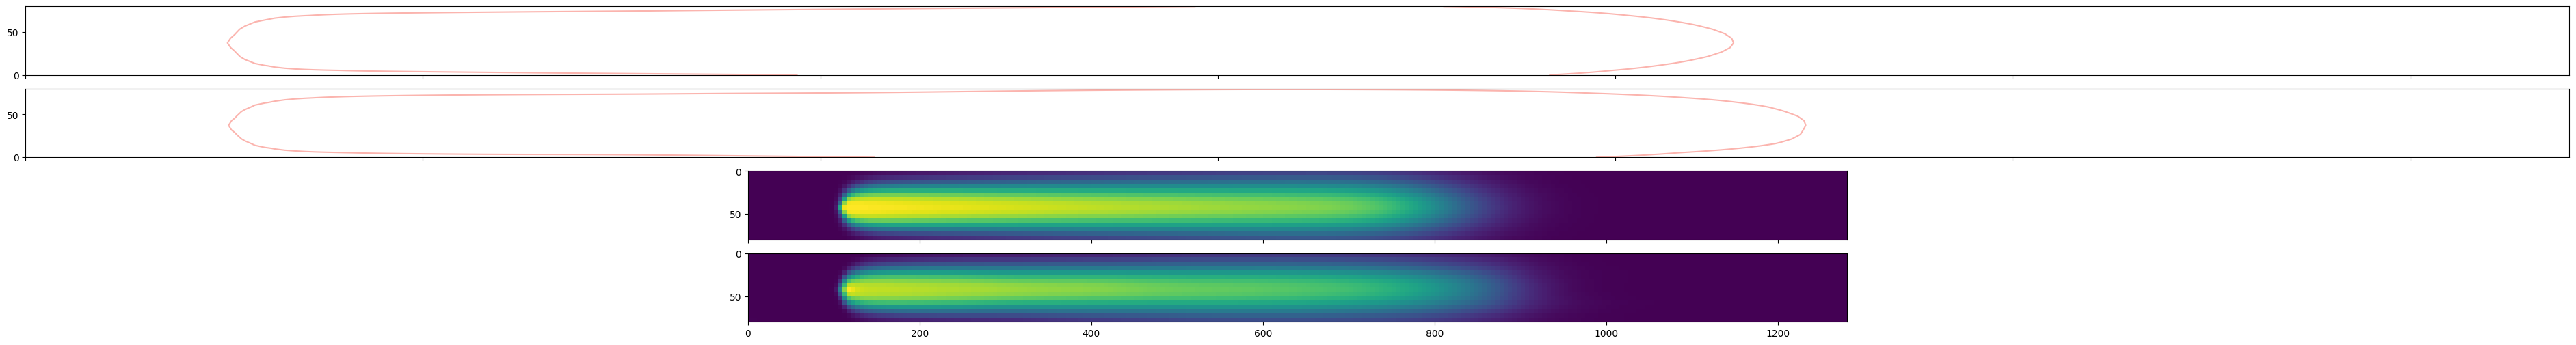

t_true length (max y): 414.16909726967936, width (max x): 80.0, max temp: 15.600358963012695
t_out length (max y): 418.83836928975285, width (max x): 80.0, max temp: 15.639373779296875


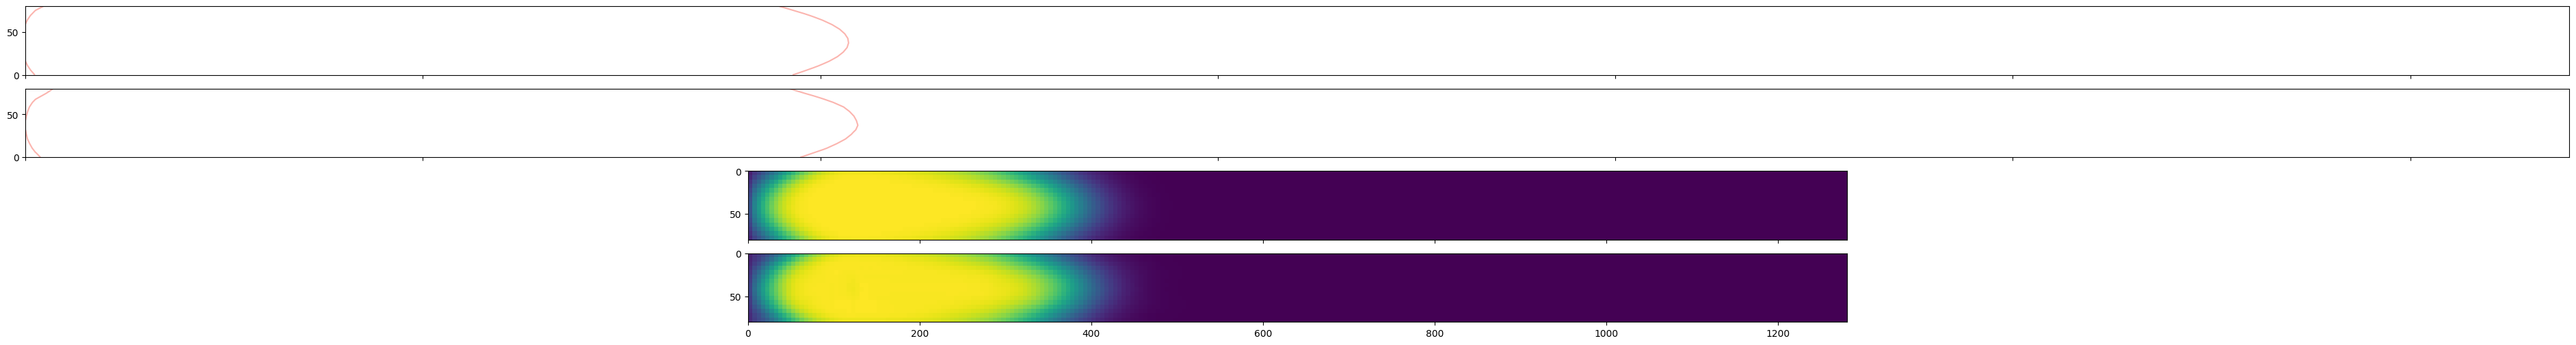

t_true length (max y): 440.6239549397085, width (max x): 80.0, max temp: 15.600377082824707
t_out length (max y): 457.6414627276935, width (max x): 80.0, max temp: 15.647428512573242


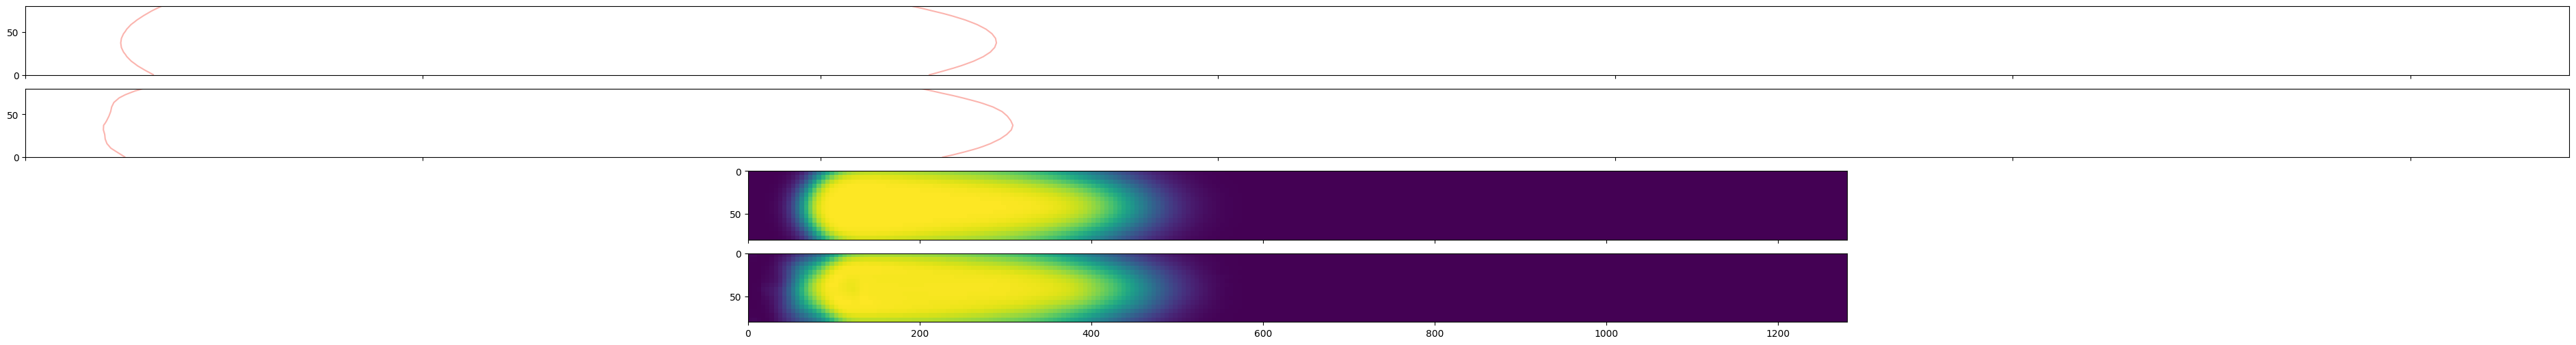

t_true length (max y): 1169.4338957740636, width (max x): 51.20290227387325, max temp: 15.562272071838379
t_out length (max y): 1172.0990711496743, width (max x): 51.87511300210491, max temp: 15.614863395690918


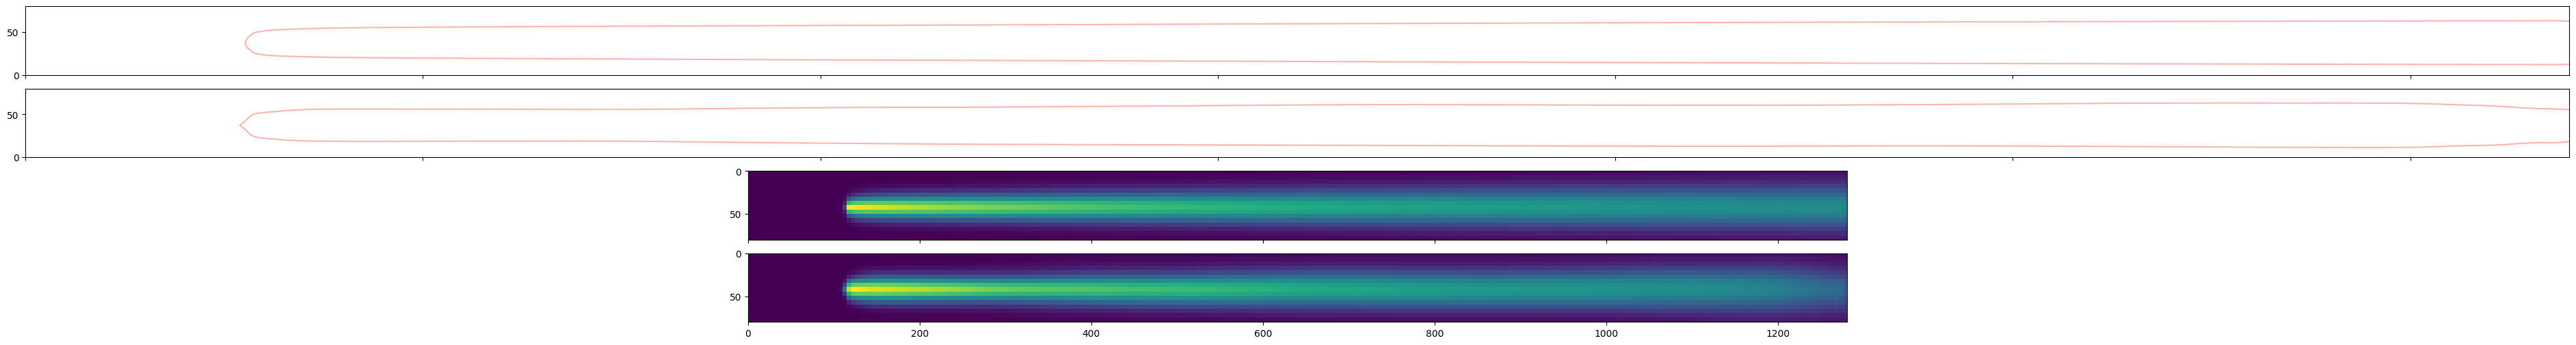

{'mean error in [°C]': -0.008722715493705537, 'max error in [°C]': 0.988926887512207, 'mean squared error in [°C^2]': 0.007976477608382184, 'max squared error in [°C^2]': 0.977976381778717}
Experiment took 0.0 minutes 3.903912803012645 seconds


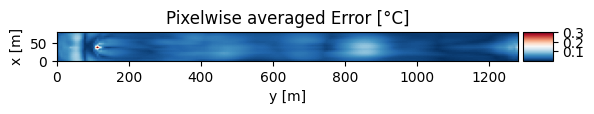

In [100]:
args["dataset_name"] = "BENCHMARK_BOXES"
args["path_to_model"] = "best_models_paper/pksi100/current_unet_benchmark_dataset_2d_100datapoints_p_v10"
args["inputs_prep"] = "pksi"

default_raw_dir, datasets_prepared_dir, dataset_prepared_full_path = set_paths(args["dataset_name"], args["inputs_prep"], args["name_extension"], args["case_2hp"])
args["datasets_path"] = datasets_prepared_dir


# prepare dataset if not done yet OR if test=case do it anyways because of potentially different std,mean,... values than trained with
if not os.path.exists(dataset_prepared_full_path) or args["case"] == "test":
    time_begin = time.perf_counter()
    args_prep = {"raw_dir": default_raw_dir,
        "datasets_dir": datasets_prepared_dir,
        "dataset_name": args["dataset_name"],
        "inputs_prep": args["inputs_prep"],
        "name_extension": args["name_extension"]}
    args_prep = SettingsPrepare(**args_prep)

    if args["case"] == "test":
        # get info of training
        with open(os.path.join(os.getcwd(), "runs", args["path_to_model"], "info.yaml"), "r") as file:
            info = yaml.safe_load(file)
        prepare_dataset(args=args_prep, info=info)
    else:
        info = prepare_dataset(args=args_prep)
        if args.case == "train":
            # store info of training
            with open(os.path.join(os.getcwd(), "runs", args["name_folder_destination"], "info.yaml"), "w") as file:
                yaml.safe_dump(info, file)

    time_end = time.perf_counter() - time_begin
    with open(dataset_prepared_full_path + "/preparation_time.yaml", "w") as file:
        yaml.safe_dump(
            {"timestamp of end": time.ctime(), 
                "duration of whole process in seconds": time_end}
        , file)
        
    print(f"Dataset {dataset_prepared_full_path} prepared")

else:
    print(f"Dataset {dataset_prepared_full_path} already prepared")


args["dataset_name"] += "_"+args["inputs_prep"] + args["name_extension"]

settings = SettingsTraining(**args)
destination_dir = pathlib.Path(os.getcwd(), "runs", settings.name_folder_destination)
destination_dir.mkdir(parents=True, exist_ok=True)
settings.save()
run(settings)

In [23]:
lengths_sim = []
lengths_nn = []
widths_sim = []
widths_nn = []
max_temps_sim = []
max_temps_nn = []

# t_true length (max y): 0, width (max x): 0, max temp: 11.429624557495117
# t_out length (max y): 0, width (max x): 0, max temp: 11.425600051879883
lengths_sim.append(0)
widths_sim.append(0)
max_temps_sim.append(11.429624557495117)
lengths_nn.append(0)
widths_nn.append(0)
max_temps_nn.append(11.425600051879883)

# t_true length (max y): 965.3775325503069, width (max x): 72.53227965013413, max temp: 15.592888832092285
# t_out length (max y): 964.3794480910087, width (max x): 73.0825080123085, max temp: 15.881373405456543
lengths_sim.append(965.3775325503069)
widths_sim.append(72.53227965013413)
max_temps_sim.append(15.592888832092285)
lengths_nn.append(964.3794480910087)
widths_nn.append(73.0825080123085)
max_temps_nn.append(15.881373405456543)

# t_true length (max y): 757.8240923948172, width (max x): 80.0, max temp: 15.598639488220215
# t_out length (max y): 793.5600377926024, width (max x): 79.13199182613423, max temp: 16.047576904296875
lengths_sim.append(757.8240923948172)
widths_sim.append(80.0)
max_temps_sim.append(15.598639488220215)
lengths_nn.append(793.5600377926024)
widths_nn.append(79.13199182613423)
max_temps_nn.append(16.047576904296875)

# t_true length (max y): 1169.4338957740636, width (max x): 51.20290227387325, max temp: 15.562272071838379
# t_out length (max y): 1172.0990711496743, width (max x): 51.87511300210491, max temp: 15.614863395690918
lengths_sim.append(1169.4338957740636)
widths_sim.append(51.20290227387325)
max_temps_sim.append(15.562272071838379)
lengths_nn.append(1172.0990711496743)
widths_nn.append(51.87511300210491)
max_temps_nn.append(15.614863395690918)

# t_true length (max y): 610.5808979828946, width (max x): 80.0, max temp: 15.599892616271973
# t_out length (max y): 614.5305353183638, width (max x): 80.0, max temp: 15.868898391723633
lengths_sim.append(610.5808979828946)
widths_sim.append(80.0)
max_temps_sim.append(15.599892616271973)
lengths_nn.append(614.5305353183638)
widths_nn.append(80.0)
max_temps_nn.append(15.868898391723633)

# t_true length (max y): 440.6239549397085, width (max x): 80.0, max temp: 15.600377082824707
# t_out length (max y): 457.6414627276935, width (max x): 80.0, max temp: 15.647428512573242
lengths_sim.append(440.6239549397085)
widths_sim.append(80.0)
max_temps_sim.append(15.600377082824707)
lengths_nn.append(457.6414627276935)
widths_nn.append(80.0)
max_temps_nn.append(15.647428512573242)

# t_true length (max y): 0, width (max x): 0, max temp: 11.246920585632324
# t_out length (max y): 0, width (max x): 0, max temp: 11.27147102355957
lengths_sim.append(0)
widths_sim.append(0)
max_temps_sim.append(11.246920585632324)
lengths_nn.append(0)
widths_nn.append(0)
max_temps_nn.append(11.27147102355957)

# t_true length (max y): 414.16909726967936, width (max x): 80.0, max temp: 15.600358963012695
# t_out length (max y): 418.83836928975285, width (max x): 80.0, max temp: 15.639373779296875
lengths_sim.append(414.16909726967936)
widths_sim.append(80.0)
max_temps_sim.append(15.600358963012695)
lengths_nn.append(418.83836928975285)
widths_nn.append(80.0)
max_temps_nn.append(15.639373779296875)

# t_true length (max y): 0, width (max x): 0, max temp: 10.99206829071045
# t_out length (max y): 0, width (max x): 0, max temp: 11.009879112243652
lengths_sim.append(0)
widths_sim.append(0)
max_temps_sim.append(10.99206829071045)
lengths_nn.append(0)
widths_nn.append(0)
max_temps_nn.append(11.009879112243652)

overall(lengths_sim, lengths_nn, widths_sim, widths_nn, max_temps_sim, max_temps_nn)


len 0 0
width 0 0
len 0 0
width 0 0
len 0 0
width 0 0
overall length2: 1.19%
overall length1: 1.78% in 6 samples
overall width2: 0.35%
overall width1: 0.53% in 6 samples
overall max temp: 0.86% in 9 samples


# gksi 100

In [15]:
args["dataset_name"] = "BENCHMARK_BOXES"
args["path_to_model"] = "best_models_paper/gksi100/current_unet_benchmark_dataset_2d_100datapoints_grad_p_v6"
args["inputs_prep"] = "gksi"

default_raw_dir, datasets_prepared_dir, dataset_prepared_full_path = set_paths(args["dataset_name"], args["inputs_prep"], args["name_extension"], args["case_2hp"])
args["datasets_path"] = datasets_prepared_dir


# prepare dataset if not done yet OR if test=case do it anyways because of potentially different std,mean,... values than trained with
if not os.path.exists(dataset_prepared_full_path) or args["case"] == "test":
    time_begin = time.perf_counter()
    args_prep = {"raw_dir": default_raw_dir,
        "datasets_dir": datasets_prepared_dir,
        "dataset_name": args["dataset_name"],
        "inputs_prep": args["inputs_prep"],
        "name_extension": args["name_extension"]}
    args_prep = SettingsPrepare(**args_prep)

    if args["case"] == "test":
        # get info of training
        with open(os.path.join(os.getcwd(), "runs", args["path_to_model"], "info.yaml"), "r") as file:
            info = yaml.safe_load(file)
        prepare_dataset(args=args_prep, info=info)
    else:
        info = prepare_dataset(args=args_prep)
        if args.case == "train":
            # store info of training
            with open(os.path.join(os.getcwd(), "runs", args["name_folder_destination"], "info.yaml"), "w") as file:
                yaml.safe_dump(info, file)

    time_end = time.perf_counter() - time_begin
    with open(dataset_prepared_full_path + "/preparation_time.yaml", "w") as file:
        yaml.safe_dump(
            {"timestamp of end": time.ctime(), 
                "duration of whole process in seconds": time_end}
        , file)
        
    print(f"Dataset {dataset_prepared_full_path} prepared")

else:
    print(f"Dataset {dataset_prepared_full_path} already prepared")


args["dataset_name"] += "_"+args["inputs_prep"] + args["name_extension"]

settings = SettingsTraining(**args)
destination_dir = pathlib.Path(os.getcwd(), "runs", settings.name_folder_destination)
destination_dir.mkdir(parents=True, exist_ok=True)
settings.save()
run(settings)

Converting:   0%|          | 0/9 [00:00<?, ?it/s]

Normalizing inputs:   0%|          | 0/9 [00:00<?, ?it/s]

Normalizing labels:   0%|          | 0/9 [00:00<?, ?it/s]

Dataset /home/pelzerja/pelzerja/test_nn/datasets_prepared/1HP_NN/BENCHMARK_BOXES_gksi prepared


t_true length (max y): 1169.4338957740636, width (max x): 51.20290227387325, max temp: 15.562272071838379
t_out length (max y): 1171.883241504977, width (max x): 69.16678804366148, max temp: 15.529790878295898
t_true length (max y): 0, width (max x): 0, max temp: 10.99206829071045
t_out length (max y): 430.3768046343147, width (max x): 15.412114971956875, max temp: 11.961559295654297
t_true length (max y): 610.5808979828946, width (max x): 80.0, max temp: 15.599892616271973
t_out length (max y): 620.2754204662749, width (max x): 80.0, max temp: 15.826227188110352
t_true length (max y): 414.16909726967936, width (max x): 80.0, max temp: 15.600358963012695
t_out length (max y): 438.3738379588095, width (max x): 80.0, max temp: 15.665746688842773
t_true length (max y): 965.3775325503069, width (max x): 72.53227965013413, max temp: 15.592888832092285
t_out length (max y): 965.3171677699522, width (max x): 73.46816346021593, max temp: 15.927945137023926
t_true length (max y): 0, width (max 

In [24]:
lengths_sim = []
lengths_nn = []
widths_sim = []
widths_nn = []
max_temps_sim = []
max_temps_nn = []

# t_true length (max y): 1169.4338957740636, width (max x): 51.20290227387325, max temp: 15.562272071838379
# t_out length (max y): 1171.883241504977, width (max x): 69.16678804366148, max temp: 15.529790878295898
lengths_sim.append(1169.4338957740636)
widths_sim.append(51.20290227387325)
max_temps_sim.append(15.562272071838379)
lengths_nn.append(1171.883241504977)
widths_nn.append(69.16678804366148)
max_temps_nn.append(15.529790878295898)

# t_true length (max y): 0, width (max x): 0, max temp: 10.99206829071045
# t_out length (max y): 430.3768046343147, width (max x): 15.412114971956875, max temp: 11.961559295654297
lengths_sim.append(0)
widths_sim.append(0)
max_temps_sim.append(10.99206829071045)
lengths_nn.append(430.3768046343147)
widths_nn.append(15.412114971956875)
max_temps_nn.append(11.961559295654297)

# t_true length (max y): 610.5808979828946, width (max x): 80.0, max temp: 15.599892616271973
# t_out length (max y): 620.2754204662749, width (max x): 80.0, max temp: 15.826227188110352
lengths_sim.append(610.5808979828946)
widths_sim.append(80.0)
max_temps_sim.append(15.599892616271973)
lengths_nn.append(620.2754204662749)
widths_nn.append(80.0)
max_temps_nn.append(15.826227188110352)

# t_true length (max y): 414.16909726967936, width (max x): 80.0, max temp: 15.600358963012695
# t_out length (max y): 438.3738379588095, width (max x): 80.0, max temp: 15.665746688842773
lengths_sim.append(414.16909726967936)
widths_sim.append(80.0)
max_temps_sim.append(15.600358963012695)
lengths_nn.append(438.3738379588095)
widths_nn.append(80.0)
max_temps_nn.append(15.665746688842773)

# t_true length (max y): 965.3775325503069, width (max x): 72.53227965013413, max temp: 15.592888832092285
# t_out length (max y): 965.3171677699522, width (max x): 73.46816346021593, max temp: 15.927945137023926
lengths_sim.append(965.3775325503069)
widths_sim.append(72.53227965013413)
max_temps_sim.append(15.592888832092285)
lengths_nn.append(965.3171677699522)
widths_nn.append(73.46816346021593)
max_temps_nn.append(15.927945137023926)

# t_true length (max y): 0, width (max x): 0, max temp: 11.429624557495117
# t_out length (max y): 0, width (max x): 0, max temp: 11.49113941192627
lengths_sim.append(0)
widths_sim.append(0)
max_temps_sim.append(11.429624557495117)
lengths_nn.append(0)
widths_nn.append(0)
max_temps_nn.append(11.49113941192627)

# t_true length (max y): 440.6239549397085, width (max x): 80.0, max temp: 15.600377082824707
# t_out length (max y): 454.55979867933496, width (max x): 80.0, max temp: 15.654571533203125
lengths_sim.append(440.6239549397085)
widths_sim.append(80.0)
max_temps_sim.append(15.600377082824707)
lengths_nn.append(454.55979867933496)
widths_nn.append(80.0)
max_temps_nn.append(15.654571533203125)

# t_true length (max y): 0, width (max x): 0, max temp: 11.246920585632324
# t_out length (max y): 0, width (max x): 0, max temp: 11.256754875183105
lengths_sim.append(0)
widths_sim.append(0)
max_temps_sim.append(11.246920585632324)
lengths_nn.append(0)
widths_nn.append(0)
max_temps_nn.append(11.256754875183105)

# t_true length (max y): 757.8240923948172, width (max x): 80.0, max temp: 15.598639488220215
# t_out length (max y): 761.917303515258, width (max x): 72.7844076154133, max temp: 16.003555297851562
lengths_sim.append(757.8240923948172)
widths_sim.append(80.0)
max_temps_sim.append(15.598639488220215)
lengths_nn.append(761.917303515258)
widths_nn.append(72.7844076154133)
max_temps_nn.append(16.003555297851562)

overall(lengths_sim, lengths_nn, widths_sim, widths_nn, max_temps_sim, max_temps_nn)

len 430.3768046343147 0
width 15.412114971956875 0
len 0 0
width 0 0
len 0 0
width 0 0
overall length2: 12.37%
overall length1: 15.91% in 7 samples
overall width2: 16.15%
overall width1: 20.77% in 7 samples
overall max temp: 1.85% in 9 samples


### ! one of the 9 benchmark cases: pksi100 erfindet einfach einen neuen heat plume von 1K wo keiner ist